Project Description:Gestational Diabetes Mellitus (GDM) is a major health condition that affects millions of people around the world. Taking adequate action at the initial stages of the disease is dependent on early GDM prognosis and detection. In recent years, the healthcare industry has investigated machine learning to assist healthcare providers in improving disease detection and prognosis.The prediction task is to determine whether a person has GDM and to find out the most risk factors.

The raw data for this study was acquired using secondary approaches. Electronic Healthcare Records dataset from figshare.com that contains CERNER records of pregnancies monitored at St. Mary's in London between April 2016 and November 2019

Baseline information on pregnant women was included in the dataset as detailed in the table below after dropping unrelated columns:

Column	Data Description
Age	Age of the participant before the pregnancy
BMI	Body mass index 
Obese	How obese the person is during the pregnancy
Glucose level blood	Sugar level in blood during pregnancy
Glucose Tolerance Test	Adaptation of body to large amount of sugar
Gestational Diabetes          	Whether the pregnant women have GDM
Systolic Blood pressure	 pressure in your arteries when your heart beats
Diastolic Blood pressure	pressure in your arteries when your heart rest
Gestation	Duration of the pregnancy
No of C-Sections	No of C-sections had prior to pregnancy
Baby Birth Weight	Weight of the baby born 
Sex	Sex of the baby born
The dataset consists of 23490 instances and fourteen attributes with thirteen of the attributes are independent variables, also known as predicates, while Gestation is the dependent or target variable.



Steps to Follow for the Project: The dataset contains 14 features and 23490 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (AdaBoostClassifier,GradientBoostingClassifier)
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [4]:
# Loading the dataset downloaded from figshare.com
cerner_dt=pd.read_excel('GDM Dataset.xlsx')
cerner_dt.tail(10)

,UID,Index of Multiple Deprivation Rank,IMD Decile,AgeAtStartOfSpell,WeightMeasured,Height,Body Mass Index at Booking,Obese?,Ethnicity,Risk Factors,...,BW Centile,Shoulder Dystocia,SCBU admission (Yes/NO),LOS mother after delivery,Sex,Still_Birth,TotalApgarScoreat1minutes,APGAR_Score_5,TotalApgarScoreat10minutes,Maternity_Month
23480,23481,22171,7,35,64.387764,161.00,24.84,No,NAF,None,...,0.0,No,No,1,Female,NO,9.0,10.0,10.0,2018/10
23481,23482,23089,8,29,62.505223,160.02,24.41,No,GBR,None,...,0.0,No,No,5,Male,NO,NaN,NaN,NaN,2016/10
23482,23483,7671,3,40,62.003200,160.00,24.22,No,OTH,None,...,0.0,No,No,2,Male,NO,NaN,NaN,NaN,2016/06
23483,23484,2844,1,31,59.988492,158.00,24.03,No,OTH,None,...,0.0,No,No,1,Female,NO,8.0,10.0,10.0,2017/01
23484,23485,19059,6,31,64.886976,168.00,22.99,No,WEU,None,...,0.0,No,No,2,Male,NO,8.0,10.0,10.0,2016/05
23485,23486,19698,6,33,63.001251,167.00,22.59,No,WEU,None,...,0.0,Yes,No,1,Female,NO,2.0,5.0,9.0,2017/03
23486,23487,32217,10,33,58.687072,164.00,21.82,No,WEU,None,...,0.0,No,No,3,Female,NO,9.0,10.0,10.0,2016/09
23487,23488,15083,5,37,60.208713,167.50,21.46,No,OTH,None,...,0.0,No,No,1,Male,NO,9.0,10.0,10.0,2016/12
23488,23489,27758,9,39,53.198284,158.00,21.31,No,OTH,None,...,0.0,No,No,2,Male,NO,NaN,NaN,NaN,2018/12
23489,23490,15036,5,22,50.012928,168.00,17.72,No,NAF,None,...,0.0,No,Yes,2,Female,NO,8.0,8.0,9.0,2018/10


# Data Cleaning and Transfroming (Exploratory Data Analysis)

In [5]:
# dropping the column that are not relevant to the study
new_dt=cerner_dt.drop(['Index of Multiple Deprivation Rank','IMD Decile','WeightMeasured','Height','Ethnicity','Risk Factors','AntenatalMedicalFactors','PreviousObstetricHistory','Parity',
               'Gravida','Glucoselevel0minblood','Glucoselevel120minblood','VitaminDlevelblood','O_Thyroidfunctionblood','Delivery_Outcome',
               'OnsetofLabourMethod','Contraction frequency prior to delivery','PrimaryIndicationforCaesarean','Category Caesarean Section',
               'Perineal care','EstimatedTotalBloodLoss','Severely Premature?','Gestation (Days)','Presence of meconium','BW Centile',
               'Shoulder Dystocia','SCBU admission (Yes/NO)','LOS mother after delivery','Still_Birth','TotalApgarScoreat1minutes',
               'APGAR_Score_5','TotalApgarScoreat10minutes'],axis=1)

In [6]:
new_dt.tail(10)

,UID,AgeAtStartOfSpell,Body Mass Index at Booking,Obese?,Glucoselevelblood,GlucoseToleranceTest,Gestational Diabetes,FolicAcidDose,SystolicBloodPressureCuff,Diastolic Blood Pressure,Gestation,Gestation at booking (Weeks),No_Of_previous_Csections,BabyBirthWeight,Sex,Maternity_Month
23480,23481,35,24.84,No,NaN,Offered and accepted,No,NaN,112.0,61.0,41,12.0,0,1000,Female,2018/10
23481,23482,29,24.41,No,NaN,Not offered,No,400 mcg,103.0,NaN,40,34.0,0,1000,Male,2016/10
23482,23483,40,24.22,No,NaN,Offered and accepted,No,400 mcg,NaN,NaN,40,NaN,0,1000,Male,2016/06
23483,23484,31,24.03,No,NaN,Offered and accepted,No,NaN,NaN,NaN,41,8.0,0,1000,Female,2017/01
23484,23485,31,22.99,No,NaN,Offered and accepted,No,Other,NaN,NaN,40,11.0,0,1000,Male,2016/05
23485,23486,33,22.59,No,NaN,NaN,No,500 mcg,NaN,NaN,41,11.0,0,1000,Female,2017/03
23486,23487,33,21.82,No,NaN,NaN,No,400 mcg,NaN,NaN,37,NaN,0,1000,Female,2016/09
23487,23488,37,21.46,No,NaN,Offered and accepted,No,400 mcg,NaN,NaN,39,16.0,0,1000,Male,2016/12
23488,23489,39,21.31,No,NaN,Offered and accepted,No,NaN,113.0,60.0,38,11.0,0,1000,Male,2018/12
23489,23490,22,17.72,No,NaN,NaN,No,400 mcg,97.0,60.0,36,11.0,0,1000,Female,2018/10


In [7]:
new_dt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UID,23490.0,11745.500000,6781.123248,1.00,5873.25,11745.50,17617.75,23490.00
AgeAtStartOfSpell,23490.0,32.037165,5.525640,14.00,28.00,32.00,36.00,53.00
Body Mass Index at Booking,23490.0,25.438646,5.215224,14.19,21.68,24.35,28.13,69.51
Glucoselevelblood,2568.0,5.082009,1.833371,2.60,4.20,4.70,5.40,38.70
SystolicBloodPressureCuff,9662.0,113.203581,13.089631,11.00,104.00,112.00,122.00,186.00
Diastolic Blood Pressure,8144.0,68.115668,9.453942,0.00,61.00,68.00,74.00,110.00
Gestation,23490.0,38.974798,1.988912,24.00,38.00,39.00,40.00,43.00
Gestation at booking (Weeks),21358.0,12.680916,6.107596,-40.00,10.00,11.00,13.00,42.00
No_Of_previous_Csections,23490.0,0.161856,0.443813,0.00,0.00,0.00,0.00,6.00
BabyBirthWeight,23490.0,3275.018178,573.537158,150.00,2980.00,3300.00,3640.00,5500.00


In [8]:
new_dt.info() # to determine the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   UID                           23490 non-null  int64  
 1   AgeAtStartOfSpell             23490 non-null  int64  
 2   Body Mass Index at Booking    23490 non-null  float64
 3   Obese?                        23490 non-null  object 
 4   Glucoselevelblood             2568 non-null   float64
 5   GlucoseToleranceTest          15213 non-null  object 
 6   Gestational Diabetes          23490 non-null  object 
 7   FolicAcidDose                 16384 non-null  object 
 8   SystolicBloodPressureCuff     9662 non-null   float64
 9   Diastolic Blood Pressure      8144 non-null   float64
 10  Gestation                     23490 non-null  int64  
 11  Gestation at booking (Weeks)  21358 non-null  float64
 12  No_Of_previous_Csections      23490 non-null  int64  
 13  B

In [9]:
# groupby column data types
new_dt.columns.groupby(new_dt.dtypes)

{int64: ['UID', 'AgeAtStartOfSpell', 'Gestation', 'No_Of_previous_Csections', 'BabyBirthWeight'], float64: ['Body Mass Index at Booking', 'Glucoselevelblood', 'SystolicBloodPressureCuff', 'Diastolic Blood Pressure', 'Gestation at booking (Weeks)'], object: ['Obese?', 'GlucoseToleranceTest', 'Gestational Diabetes', 'FolicAcidDose', 'Sex', 'Maternity_Month']}

In [10]:
# number of columns of a particular data type
print("No of columns for {} is {}.".format(list(new_dt.columns.groupby(new_dt.dtypes).keys())[0], len(new_dt.columns.groupby(new_dt.dtypes)[list(new_dt.columns.groupby(new_dt.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(new_dt.columns.groupby(new_dt.dtypes).keys())[1], len(new_dt.columns.groupby(new_dt.dtypes)[list(new_dt.columns.groupby(new_dt.dtypes).keys())[1]])))
print("No of columns for {} is {}.".format(list(new_dt.columns.groupby(new_dt.dtypes).keys())[2], len(new_dt.columns.groupby(new_dt.dtypes)[list(new_dt.columns.groupby(new_dt.dtypes).keys())[2]])))

No of columns for int64 is 5.
No of columns for float64 is 5.
No of columns for object is 6.


In [11]:
new_dt.shape # to determine the shape of the dataset

(23490, 16)

In [12]:
# Checking for null values
new_dt.isnull().sum()

UID                                 0
AgeAtStartOfSpell                   0
Body Mass Index at Booking          0
Obese?                              0
Glucoselevelblood               20922
GlucoseToleranceTest             8277
Gestational Diabetes                0
FolicAcidDose                    7106
SystolicBloodPressureCuff       13828
Diastolic Blood Pressure        15346
Gestation                           0
Gestation at booking (Weeks)     2132
No_Of_previous_Csections            0
BabyBirthWeight                     0
Sex                                 0
Maternity_Month                     0
dtype: int64

In [13]:
# Replacing the null values with the mode imputation
# Imputating Missing value with mode for categorical features
new_dt['Glucoselevelblood'].fillna(new_dt['Glucoselevelblood'].mode()[0],inplace=True)
new_dt['GlucoseToleranceTest'].fillna(new_dt['GlucoseToleranceTest'].mode()[0],inplace=True)
new_dt['FolicAcidDose'].fillna(new_dt['FolicAcidDose'].mode()[0], inplace=True)
new_dt['SystolicBloodPressureCuff'].fillna(new_dt['SystolicBloodPressureCuff'].mode()[0],inplace=True)
new_dt['Diastolic Blood Pressure'].fillna(new_dt['Diastolic Blood Pressure'].mode()[0],inplace=True)
new_dt['Gestation at booking (Weeks)'].fillna(new_dt['Gestation at booking (Weeks)'].mode()[0],inplace=True)

<AxesSubplot:>

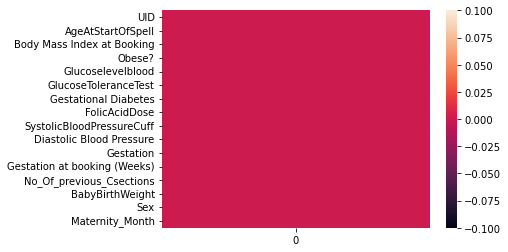

In [14]:
# Using Heat map to check for confirmation of  null values removal
sns.heatmap(new_dt.isnull().sum().to_frame())

In [15]:
new_dt.tail(10)

,UID,AgeAtStartOfSpell,Body Mass Index at Booking,Obese?,Glucoselevelblood,GlucoseToleranceTest,Gestational Diabetes,FolicAcidDose,SystolicBloodPressureCuff,Diastolic Blood Pressure,Gestation,Gestation at booking (Weeks),No_Of_previous_Csections,BabyBirthWeight,Sex,Maternity_Month
23480,23481,35,24.84,No,4.6,Offered and accepted,No,400 mcg,112.0,61.0,41,12.0,0,1000,Female,2018/10
23481,23482,29,24.41,No,4.6,Not offered,No,400 mcg,103.0,60.0,40,34.0,0,1000,Male,2016/10
23482,23483,40,24.22,No,4.6,Offered and accepted,No,400 mcg,110.0,60.0,40,10.0,0,1000,Male,2016/06
23483,23484,31,24.03,No,4.6,Offered and accepted,No,400 mcg,110.0,60.0,41,8.0,0,1000,Female,2017/01
23484,23485,31,22.99,No,4.6,Offered and accepted,No,Other,110.0,60.0,40,11.0,0,1000,Male,2016/05
23485,23486,33,22.59,No,4.6,Offered and accepted,No,500 mcg,110.0,60.0,41,11.0,0,1000,Female,2017/03
23486,23487,33,21.82,No,4.6,Offered and accepted,No,400 mcg,110.0,60.0,37,10.0,0,1000,Female,2016/09
23487,23488,37,21.46,No,4.6,Offered and accepted,No,400 mcg,110.0,60.0,39,16.0,0,1000,Male,2016/12
23488,23489,39,21.31,No,4.6,Offered and accepted,No,400 mcg,113.0,60.0,38,11.0,0,1000,Male,2018/12
23489,23490,22,17.72,No,4.6,Offered and accepted,No,400 mcg,97.0,60.0,36,11.0,0,1000,Female,2018/10


In [16]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
Cat_Var = ['Obese?','GlucoseToleranceTest', 'Gestational Diabetes', 'FolicAcidDose', 'Sex']
le = LabelEncoder()
for i in Cat_Var:
    new_dt[i] = le.fit_transform(new_dt[i])
new_dt.head()

,UID,AgeAtStartOfSpell,Body Mass Index at Booking,Obese?,Glucoselevelblood,GlucoseToleranceTest,Gestational Diabetes,FolicAcidDose,SystolicBloodPressureCuff,Diastolic Blood Pressure,Gestation,Gestation at booking (Weeks),No_Of_previous_Csections,BabyBirthWeight,Sex,Maternity_Month
0,1,30,31.88,1,4.6,1,0,0,104.0,60.0,38,8.0,0,3240,0,2016/04
1,2,29,30.41,1,4.6,1,0,0,110.0,60.0,42,11.0,0,3700,1,2017/02
2,3,22,23.17,0,4.6,2,0,0,110.0,89.0,39,15.0,0,3500,0,2018/05
3,4,31,17.30,0,4.6,0,0,0,110.0,60.0,39,12.0,0,3335,0,2017/09
4,5,24,18.57,0,4.6,0,0,0,110.0,60.0,39,12.0,0,3334,0,2016/08


In [17]:
# Converting Maternity_Month into Year and Month 

new_dt[['Year','Month']] = new_dt['Maternity_Month'].str.split("/",expand = True)
# splitting the date into year,month day using python split function

In [18]:
new_dt[['Year','Month']]=new_dt[['Year','Month']].astype(int)

In [19]:
new_dt.drop(['Maternity_Month'],axis=1)

,UID,AgeAtStartOfSpell,Body Mass Index at Booking,Obese?,Glucoselevelblood,GlucoseToleranceTest,Gestational Diabetes,FolicAcidDose,SystolicBloodPressureCuff,Diastolic Blood Pressure,Gestation,Gestation at booking (Weeks),No_Of_previous_Csections,BabyBirthWeight,Sex,Year,Month
0,1,30,31.88,1,4.6,1,0,0,104.0,60.0,38,8.0,0,3240,0,2016,4
1,2,29,30.41,1,4.6,1,0,0,110.0,60.0,42,11.0,0,3700,1,2017,2
2,3,22,23.17,0,4.6,2,0,0,110.0,89.0,39,15.0,0,3500,0,2018,5
3,4,31,17.30,0,4.6,0,0,0,110.0,60.0,39,12.0,0,3335,0,2017,9
4,5,24,18.57,0,4.6,0,0,0,110.0,60.0,39,12.0,0,3334,0,2016,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,23486,33,22.59,0,4.6,1,0,1,110.0,60.0,41,11.0,0,1000,0,2017,3
23486,23487,33,21.82,0,4.6,1,0,0,110.0,60.0,37,10.0,0,1000,0,2016,9
23487,23488,37,21.46,0,4.6,1,0,0,110.0,60.0,39,16.0,0,1000,1,2016,12
23488,23489,39,21.31,0,4.6,1,0,0,113.0,60.0,38,11.0,0,1000,1,2018,12


In [20]:
# Checking for null values
new_dt.isnull().sum()

UID                             0
AgeAtStartOfSpell               0
Body Mass Index at Booking      0
Obese?                          0
Glucoselevelblood               0
GlucoseToleranceTest            0
Gestational Diabetes            0
FolicAcidDose                   0
SystolicBloodPressureCuff       0
Diastolic Blood Pressure        0
Gestation                       0
Gestation at booking (Weeks)    0
No_Of_previous_Csections        0
BabyBirthWeight                 0
Sex                             0
Maternity_Month                 0
Year                            0
Month                           0
dtype: int64

In [21]:
# Checking for duplicated values since the dataset is large
new_dt.duplicated().sum()


0

In [22]:
new_dt.shape # 3465 duplicates value was removed

(23490, 18)

In [23]:
# Checking presnce of ? in dataset
new_dt.isin([' ?']).sum()

UID                             0
AgeAtStartOfSpell               0
Body Mass Index at Booking      0
Obese?                          0
Glucoselevelblood               0
GlucoseToleranceTest            0
Gestational Diabetes            0
FolicAcidDose                   0
SystolicBloodPressureCuff       0
Diastolic Blood Pressure        0
Gestation                       0
Gestation at booking (Weeks)    0
No_Of_previous_Csections        0
BabyBirthWeight                 0
Sex                             0
Maternity_Month                 0
Year                            0
Month                           0
dtype: int64

# Univarite Analysis

In [24]:
# Determine the unique values for GDM
GDM_status = new_dt["Gestational Diabetes"].value_counts()
GDM_status

0    21636
1     1854
Name: Gestational Diabetes, dtype: int64

                           Target Variable Distribution                          


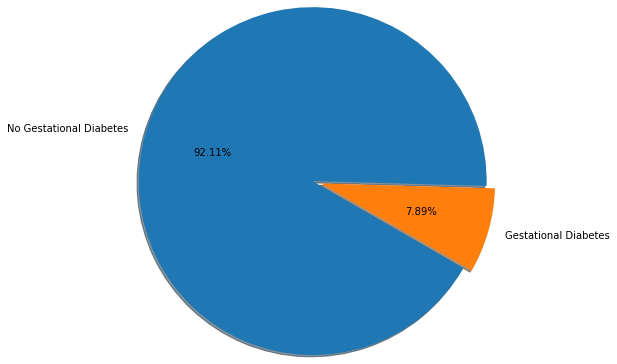

In [25]:
labels = ['No Gestational Diabetes','Gestational Diabetes']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(new_dt["Gestational Diabetes"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

<AxesSubplot:xlabel='Gestational Diabetes', ylabel='count'>

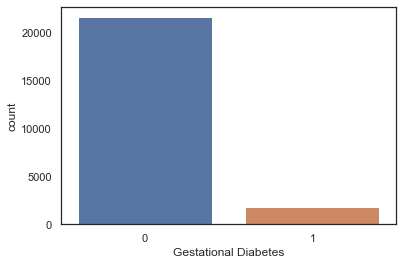

In [26]:
#Analysis of Income Status
sns.set(style="white")
sns.countplot(x = 'Gestational Diabetes', data =new_dt)

# 92.11 % population do not have Gesttional diabtetes while 7,89%  of the population have gestational diabetes, we can see that target variable income is imbalanced

In [27]:
# Determine the unique values for obesity
obese_status = new_dt["Obese?"].value_counts()
obese_status

0    19466
1     4024
Name: Obese?, dtype: int64

                                  Obesity status                                 


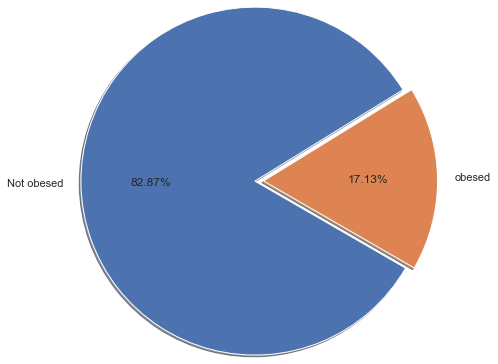

In [28]:
labels = ['Not obesed','obesed']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mObesity status'.center(85))
plt.pie(new_dt["Obese?"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

                                Gender Distribution                              


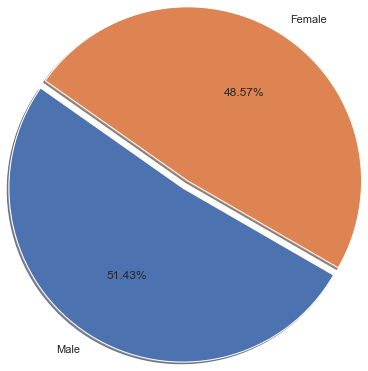

In [29]:
labels = ['Male','Female']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1m Gender Distribution'.center(85))
plt.pie(new_dt["Sex"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

# 51.43 % population are male while 48.57% of the population are female.

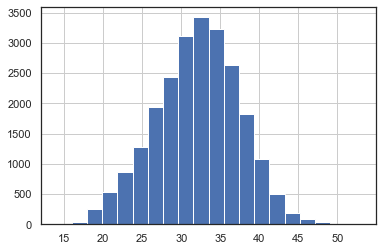

In [30]:
# Diffirent age categories for the titanic passengers
hisr = new_dt['AgeAtStartOfSpell'].hist(bins=20)

# Bivarite Analysis

In [169]:
# function to Visualizing Categorical values using Box plot
def features_plot(columns):
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    col_name=['Obese?','GlucoseToleranceTest', 'Gestation', 'FolicAcidDose', 'Sex','Body Mass Index at Booking','SystolicBloodPressureCuff','Diastolic Blood Pressure','No_Of_previous_Csections']
    sns.countplot(x=columns,hue='Gestational Diabetes', data=new_dt)
   # sns.pointplot(y=columns,x='Gestational Diabetes', data=new_dt,hue='Gestational Diabetes',join=False)
    plt.title(f"{columns.title()} vs Gestational Diabetes",fontweight="black",size=25,pad=10,)
    plt.legend(title='subscribed', loc='upper right', labels=['No GDM','GDM'])
    col_values = new_dt[columns].value_counts()
    plt.tight_layout()

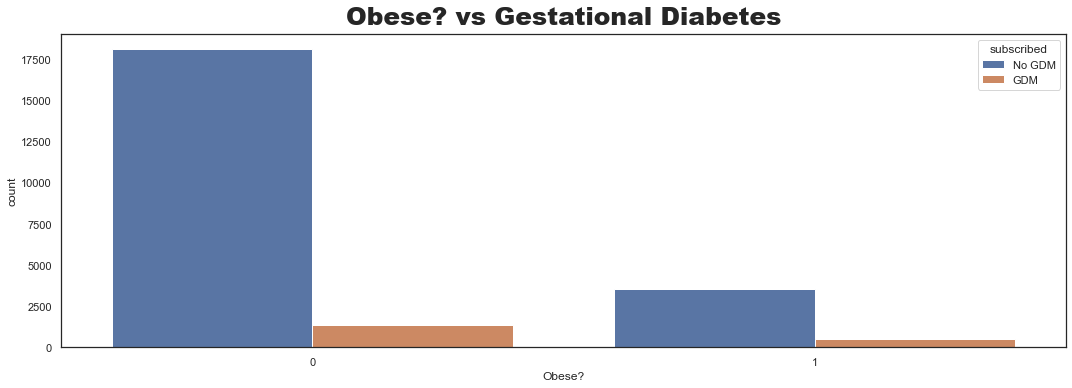

In [170]:
features_plot('Obese?')


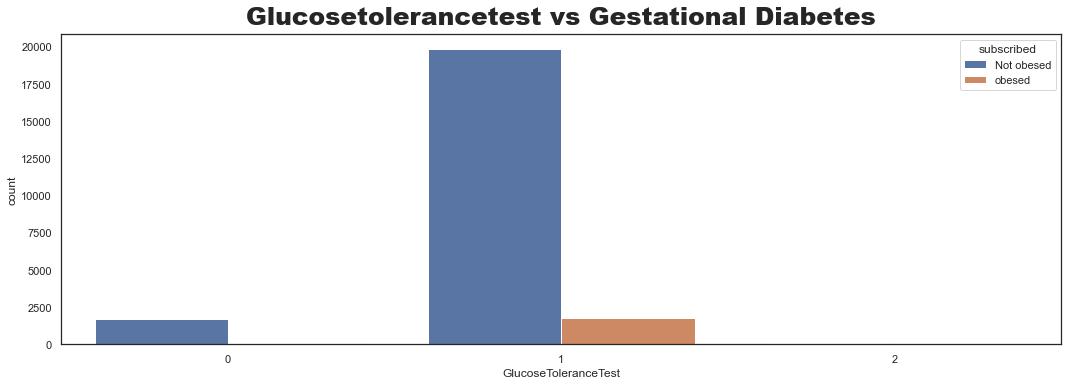

In [33]:
features_plot('GlucoseToleranceTest')

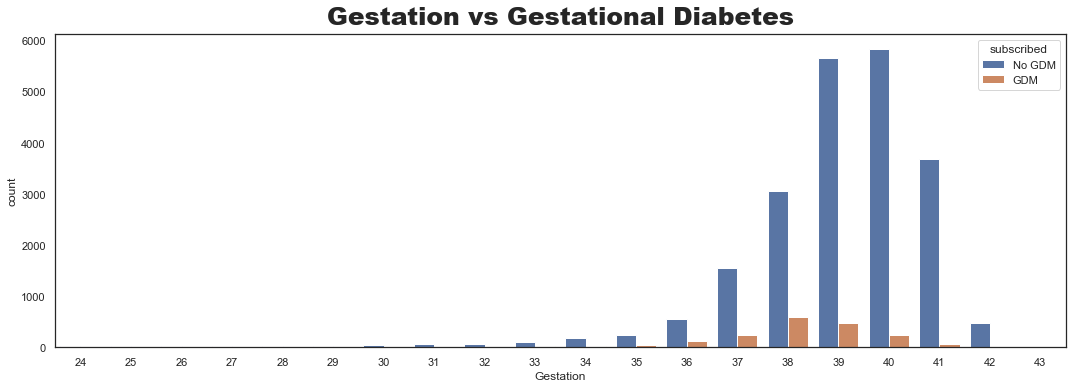

In [171]:
features_plot('Gestation')

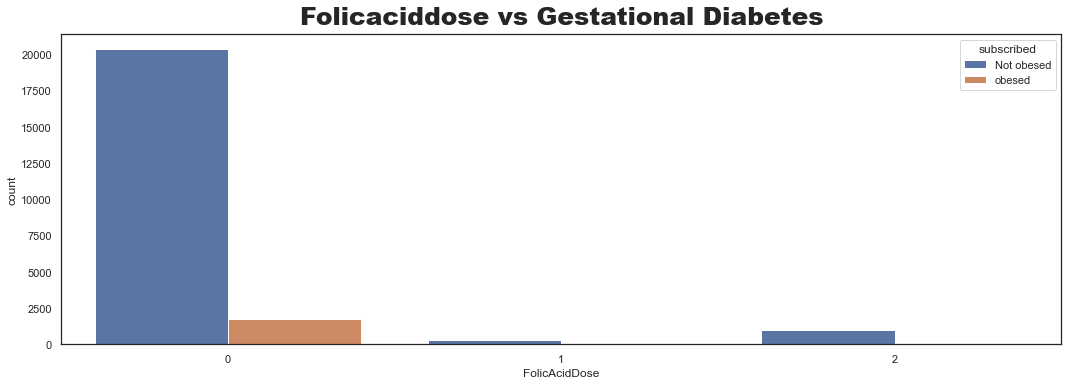

In [35]:
features_plot('FolicAcidDose')

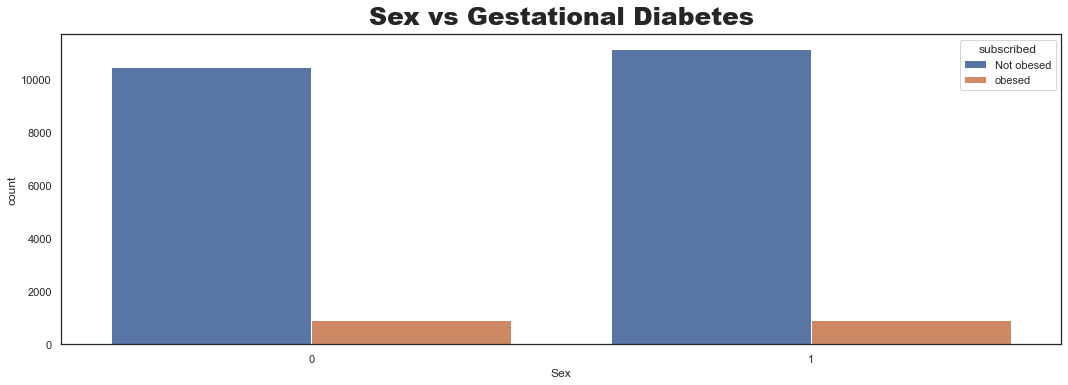

In [36]:
features_plot('Sex')

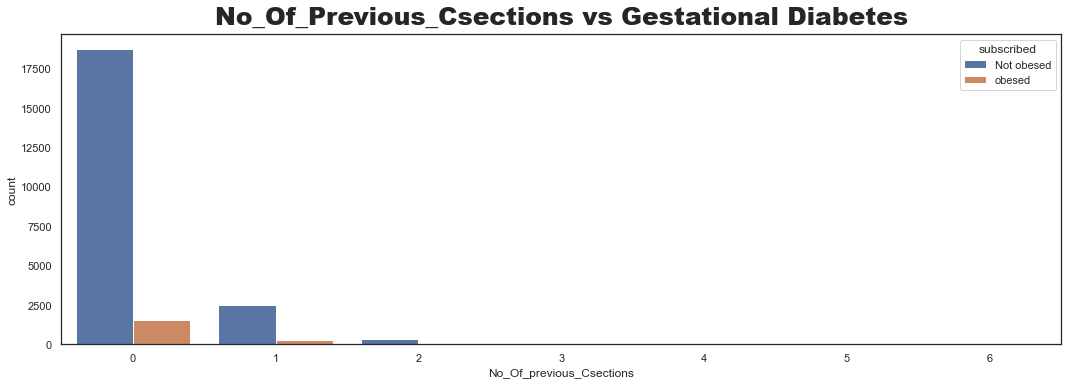

In [37]:
features_plot('No_Of_previous_Csections')#Body Mass Index at Booking

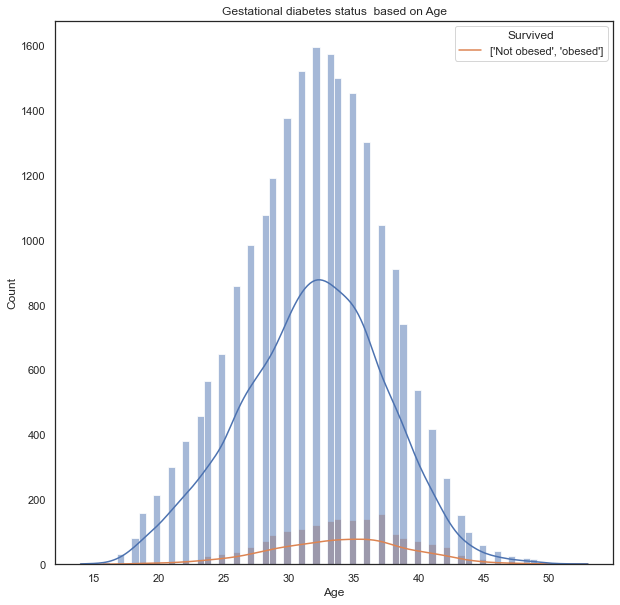

In [38]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(10, 10))
sns.histplot(x='AgeAtStartOfSpell', hue='Gestational Diabetes', data=new_dt, kde=True)
plt.title('Gestational diabetes status  based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=[['Not obesed','obesed']])
plt.show()

# Multivarite Analysis

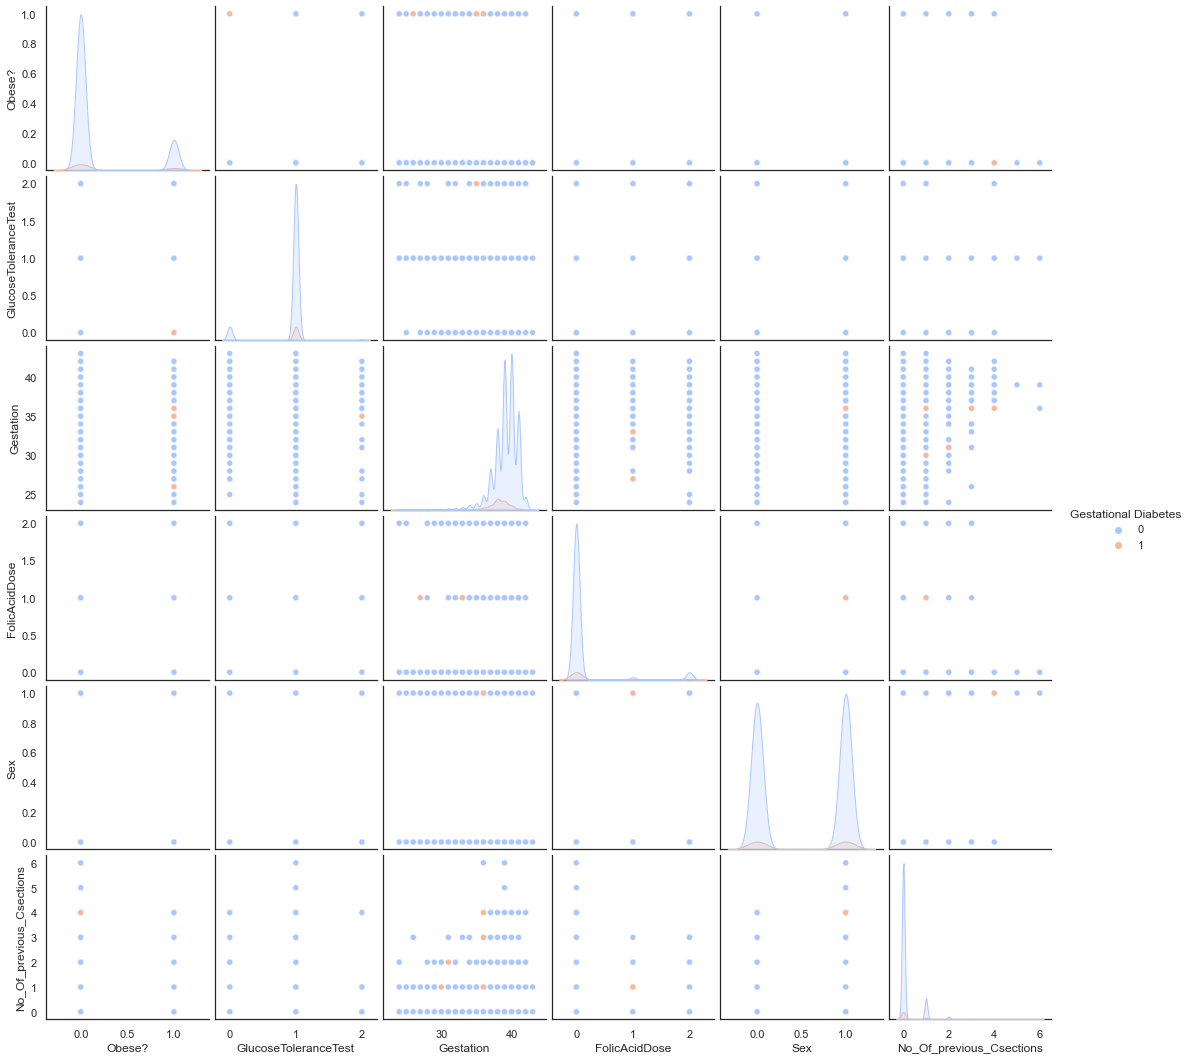

In [39]:
#Pairplot of all numerical variables
sns.pairplot(new_dt,vars=['Obese?','GlucoseToleranceTest', 'Gestation', 'FolicAcidDose', 'Sex','No_Of_previous_Csections'],hue='Gestational Diabetes',palette="coolwarm")
plt.show()

In [40]:
new_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   UID                           23490 non-null  int64  
 1   AgeAtStartOfSpell             23490 non-null  int64  
 2   Body Mass Index at Booking    23490 non-null  float64
 3   Obese?                        23490 non-null  int32  
 4   Glucoselevelblood             23490 non-null  float64
 5   GlucoseToleranceTest          23490 non-null  int32  
 6   Gestational Diabetes          23490 non-null  int32  
 7   FolicAcidDose                 23490 non-null  int32  
 8   SystolicBloodPressureCuff     23490 non-null  float64
 9   Diastolic Blood Pressure      23490 non-null  float64
 10  Gestation                     23490 non-null  int64  
 11  Gestation at booking (Weeks)  23490 non-null  float64
 12  No_Of_previous_Csections      23490 non-null  int64  
 13  B

In [41]:
new_dt[['Body Mass Index at Booking','Glucoselevelblood','SystolicBloodPressureCuff','Diastolic Blood Pressure','Gestation at booking (Weeks)']]=new_dt[['Body Mass Index at Booking','Glucoselevelblood','SystolicBloodPressureCuff','Diastolic Blood Pressure','Gestation at booking (Weeks)']].astype(int)

In [42]:
new_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   UID                           23490 non-null  int64 
 1   AgeAtStartOfSpell             23490 non-null  int64 
 2   Body Mass Index at Booking    23490 non-null  int32 
 3   Obese?                        23490 non-null  int32 
 4   Glucoselevelblood             23490 non-null  int32 
 5   GlucoseToleranceTest          23490 non-null  int32 
 6   Gestational Diabetes          23490 non-null  int32 
 7   FolicAcidDose                 23490 non-null  int32 
 8   SystolicBloodPressureCuff     23490 non-null  int32 
 9   Diastolic Blood Pressure      23490 non-null  int32 
 10  Gestation                     23490 non-null  int64 
 11  Gestation at booking (Weeks)  23490 non-null  int32 
 12  No_Of_previous_Csections      23490 non-null  int64 
 13  BabyBirthWeight 

# Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

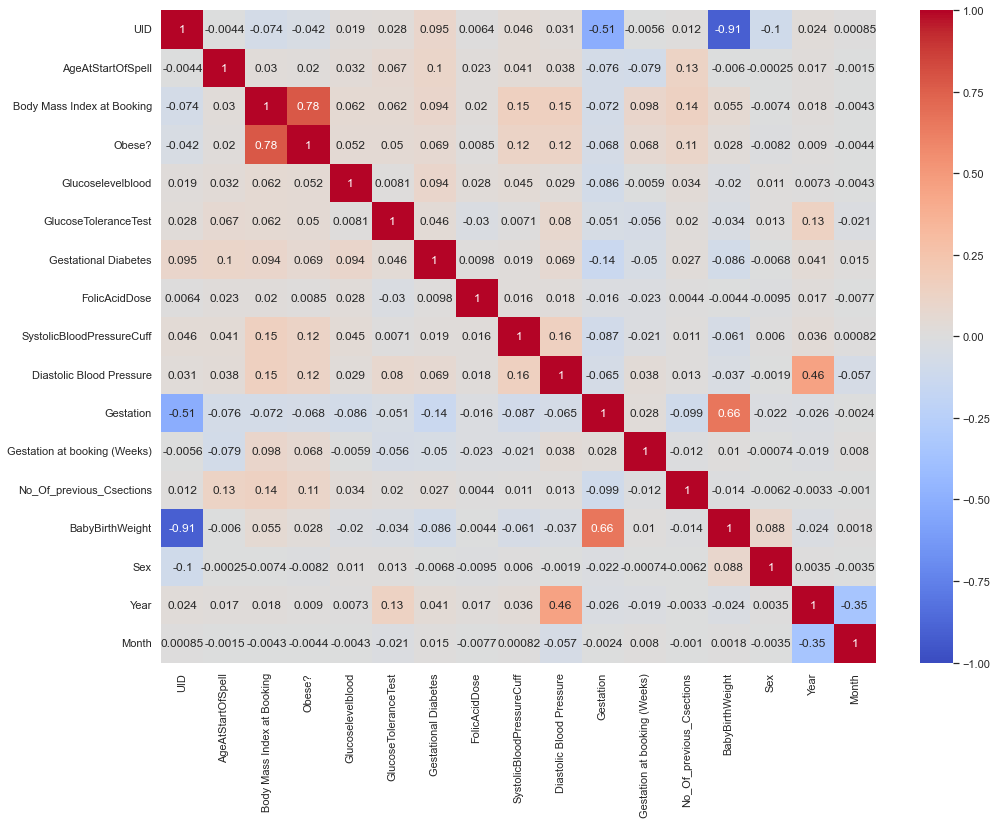

In [43]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(new_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=new_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

From the correlation heatmap, we can see that the dependent feature 'Gestational Diabetes' is highly correlated with Body Mass Index, Obesity, Diastolic Blood pressure,Gestaion and Weight of the baby.

In [44]:
#new_dt.statistics()

# Outliers Removal to avoid Over/underfittings

In [45]:
# Checking for Outliers
# Checking for skewness of the data to determine outliers
new_dt.skew()

UID                              0.000000
AgeAtStartOfSpell               -0.101853
Body Mass Index at Booking       1.231548
Obese?                           1.744873
Glucoselevelblood               20.504857
GlucoseToleranceTest            -2.690747
Gestational Diabetes             3.123594
FolicAcidDose                    3.986940
SystolicBloodPressureCuff        1.295430
Diastolic Blood Pressure         1.075176
Gestation                       -2.497425
Gestation at booking (Weeks)     2.605635
No_Of_previous_Csections         3.385898
BabyBirthWeight                 -0.913864
Sex                             -0.057072
Year                             0.192759
Month                           -0.035485
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform # using power Transformation method to remove outliers from Capital_gain and Capital loss
#new_dt[['FolicAcidDose','No_Of_previous_Csections','Glucoselevelblood']]=power_transform(new_dt[['FolicAcidDose','No_Of_previous_Csections','Glucoselevelblood']],method='yeo-johnson')
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['FolicAcidDose','No_Of_previous_Csections','Glucoselevelblood']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
new_dt[skew] = scaler.fit_transform(new_dt[skew].values)

In [47]:
# Checking for skewness of the data after transformatio
new_dt.skew()

UID                             0.000000
AgeAtStartOfSpell              -0.101853
Body Mass Index at Booking      1.231548
Obese?                          1.744873
Glucoselevelblood              -1.640535
GlucoseToleranceTest           -2.690747
Gestational Diabetes            3.123594
FolicAcidDose                   3.706341
SystolicBloodPressureCuff       1.295430
Diastolic Blood Pressure        1.075176
Gestation                      -2.497425
Gestation at booking (Weeks)    2.605635
No_Of_previous_Csections        2.103774
BabyBirthWeight                -0.913864
Sex                            -0.057072
Year                            0.192759
Month                          -0.035485
dtype: float64

In [48]:
#print("Display original dataframe")
##rint(new_dt.shape)
#print('/n')
#Q1 = new_dt.quantile(0.15)
#Q3 = new_dt.quantile(0.85)
#IQR = Q3 - Q1
#new_dt_out = new_dt[~((new_dt < (Q1 - 1.5 * IQR)) |(new_dt > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(new_dt_out.shape)

In [49]:
#print ("Percentage of data loss post outlier removal: ", (new_dt.shape[0]-new_dt_out.shape[0])/new_dt.shape[0]*100)

In [50]:
new_dt.head(20)

,UID,AgeAtStartOfSpell,Body Mass Index at Booking,Obese?,Glucoselevelblood,GlucoseToleranceTest,Gestational Diabetes,FolicAcidDose,SystolicBloodPressureCuff,Diastolic Blood Pressure,Gestation,Gestation at booking (Weeks),No_Of_previous_Csections,BabyBirthWeight,Sex,Maternity_Month,Year,Month
0,1,30,31,1,-0.062302,1,0,-0.252607,104,60,38,8,-0.399499,3240,0,2016/04,2016,4
1,2,29,30,1,-0.062302,1,0,-0.252607,110,60,42,11,-0.399499,3700,1,2017/02,2017,2
2,3,22,23,0,-0.062302,2,0,-0.252607,110,89,39,15,-0.399499,3500,0,2018/05,2018,5
3,4,31,17,0,-0.062302,0,0,-0.252607,110,60,39,12,-0.399499,3335,0,2017/09,2017,9
4,5,24,18,0,-0.062302,0,0,-0.252607,110,60,39,12,-0.399499,3334,0,2016/08,2016,8
5,6,36,21,0,-0.062302,1,0,-0.252607,110,60,39,11,-0.399499,3331,0,2016/11,2016,11
6,7,39,19,0,-0.062302,1,0,-0.252607,110,60,37,13,-0.399499,2432,0,2017/08,2017,8
7,8,31,28,0,-0.062302,1,0,-0.252607,112,60,32,12,-0.399499,1650,0,2017/04,2017,4
8,9,28,22,0,-0.062302,1,0,-0.252607,110,60,29,10,2.502579,905,0,2017/01,2017,1
9,10,20,34,1,-0.062302,1,0,-0.252607,103,69,40,7,-0.399499,5500,1,2019/02,2019,2


# Data Preprocessing for Classification problem

In [51]:
# Separating feature data and Label data
X = new_dt.drop(['Gestational Diabetes','Month','Maternity_Month'],axis=1)
y= new_dt['Gestational Diabetes']

In [52]:
y.value_counts()

0    21636
1     1854
Name: Gestational Diabetes, dtype: int64

In [53]:
X

,UID,AgeAtStartOfSpell,Body Mass Index at Booking,Obese?,Glucoselevelblood,GlucoseToleranceTest,FolicAcidDose,SystolicBloodPressureCuff,Diastolic Blood Pressure,Gestation,Gestation at booking (Weeks),No_Of_previous_Csections,BabyBirthWeight,Sex,Year
0,1,30,31,1,-0.062302,1,-0.252607,104,60,38,8,-0.399499,3240,0,2016
1,2,29,30,1,-0.062302,1,-0.252607,110,60,42,11,-0.399499,3700,1,2017
2,3,22,23,0,-0.062302,2,-0.252607,110,89,39,15,-0.399499,3500,0,2018
3,4,31,17,0,-0.062302,0,-0.252607,110,60,39,12,-0.399499,3335,0,2017
4,5,24,18,0,-0.062302,0,-0.252607,110,60,39,12,-0.399499,3334,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,23486,33,22,0,-0.062302,1,3.958680,110,60,41,11,-0.399499,1000,0,2017
23486,23487,33,21,0,-0.062302,1,-0.252607,110,60,37,10,-0.399499,1000,0,2016
23487,23488,37,21,0,-0.062302,1,-0.252607,110,60,39,16,-0.399499,1000,1,2016
23488,23489,39,21,0,-0.062302,1,-0.252607,113,60,38,11,-0.399499,1000,1,2018


In [54]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17617, 15), (5873, 15), (17617,), (5873,))

# Balanced Dataset with SMOTEENN (SMOTE + ENN Algorithm)

In [57]:
#SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
counter=Counter(y_train)
print('Before',counter)
# Oversampling the train data with the concept of SMOTE
smote_os = SMOTEENN(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(X_train, y_train)
counter=Counter(y_smote)
print('After',counter)

Before Counter({0: 16183, 1: 1434})
After Counter({1: 13457, 0: 9217})


In [58]:
X_train

,UID,AgeAtStartOfSpell,Body Mass Index at Booking,Obese?,Glucoselevelblood,GlucoseToleranceTest,FolicAcidDose,SystolicBloodPressureCuff,Diastolic Blood Pressure,Gestation,Gestation at booking (Weeks),No_Of_previous_Csections,BabyBirthWeight,Sex,Year
16097,16098,26,34,1,-0.062302,1,-0.252607,110,60,40,11,-0.399499,3065,0,2017
10231,10232,25,49,1,-0.062302,1,-0.252607,127,60,39,38,-0.399499,3380,1,2017
18212,18213,28,24,0,-0.062302,0,3.958722,117,68,40,9,-0.399499,2920,0,2018
12463,12464,31,26,0,-0.062302,1,-0.252607,111,55,41,10,-0.399499,3260,0,2019
11520,11521,29,33,1,-0.062302,1,-0.252607,106,60,39,13,-0.399499,3310,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,11965,36,19,0,-0.062302,1,-0.252607,110,60,40,9,-0.399499,3300,0,2016
21575,21576,26,26,0,-0.062302,1,-0.252607,114,60,38,10,-0.399499,2500,0,2017
5390,5391,39,25,0,-0.062302,0,-0.252607,117,60,40,10,-0.399499,3660,0,2017
860,861,37,20,0,-0.062302,1,-0.252607,128,65,41,8,-0.399499,4200,1,2019


In [59]:
y_smote.value_counts()

1    13457
0     9217
Name: Gestational Diabetes, dtype: int64

Training dataset Before Smoteenn
                                    DM  status                                    


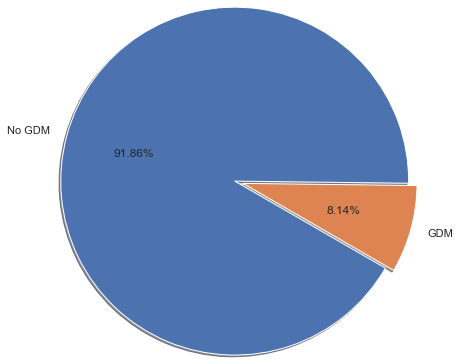


training dataset after Smoteen
                                    DM  status                                    


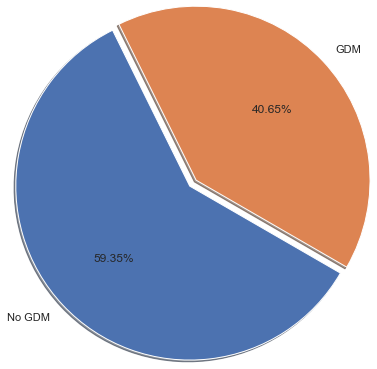

In [60]:
print("Training dataset Before Smoteenn")
labels = ['No GDM','GDM']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[GDM  status'.center(85))
plt.pie(y_train.value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()
print()
print("training dataset after Smoteen")
# Training dataset After Smoteenn
labels = ['No GDM','GDM']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[GDM  status'.center(85))
plt.pie(y_smote.value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

# Build/Test multiple models

In [61]:
#Using Adaboost 
#from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_smote, y_smote)
round(model.score(X_test,y_test)*100,2)

76.3

In [62]:
model_pred = model.predict(X_test)  # Predict Test data
model_pred

array([0, 1, 0, ..., 1, 0, 0])

In [63]:
# Using Gradient Boosting
model1= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model1.fit(X_smote, y_smote)
round(model1.score(X_test,y_test)*100,2)

56.09

In [80]:
model1_pred = model1.predict(X_test)  # Predict Test data
model1_pred

array([0, 1, 0, ..., 1, 1, 1])

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   UID                           23490 non-null  int64  
 1   AgeAtStartOfSpell             23490 non-null  int64  
 2   Body Mass Index at Booking    23490 non-null  int32  
 3   Obese?                        23490 non-null  int32  
 4   Glucoselevelblood             23490 non-null  float64
 5   GlucoseToleranceTest          23490 non-null  int32  
 6   FolicAcidDose                 23490 non-null  float64
 7   SystolicBloodPressureCuff     23490 non-null  int32  
 8   Diastolic Blood Pressure      23490 non-null  int32  
 9   Gestation                     23490 non-null  int64  
 10  Gestation at booking (Weeks)  23490 non-null  int32  
 11  No_Of_previous_Csections      23490 non-null  float64
 12  BabyBirthWeight               23490 non-null  int64  
 13  S

In [82]:
# Using Catboost
#from catboost import CatBoostClassifier
cat_features=([0,1,2,3,5,7,8,9,10,12,13,14])
model2 = CatBoostClassifier(iterations=6,learning_rate=0.1)#loss_function='CrossEntropy'
model2.fit(X_smote,y_smote,cat_features=cat_features,eval_set=(X_test, y_test),verbose=False)
round(model2.score(X_test,y_test)*100,2)                   
                  

70.82

In [83]:
model2_pred = model2.predict(X_test)  # Predict Test data
model2_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
# Using XGboost model
from xgboost import XGBClassifier
model3= xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model3.fit(X_smote, y_smote)
round(model3.score(X_test,y_test)*100,2)

73.47

In [86]:
model3_pred = model3.predict(X_test)  # Predict Test data
model3_pred

array([0, 1, 0, ..., 1, 0, 0])

# Cross Validation of all the models on the same dataset using K-fold

In [88]:
k_folds = KFold(n_splits = 10)

In [89]:
# Create instances of all other classifier- Using other models
#lgb1=LGBMClassifier()
cbt =CatBoostClassifier() 
xgb = XGBClassifier() 
abc = AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [91]:
# Perform 7-fold cross-validation for both models
#lgb_scores =cross_val_score(lgb1, X, y, cv=k_folds)
cbt_scores = cross_val_score(cbt, X, y, cv=k_folds)
xgb_scores = cross_val_score(xgb,X, y, cv=k_folds)
abc_scores = cross_val_score(abc, X, y, cv=k_folds)
gbc_scores = cross_val_score(gbc, X, y, cv=k_folds)

#print("Cross Validation Scores: ", scores)
#print("Average CV Score for Light boosting classifier is : ", lgb_scores.mean()*100)
#print('\n')
print("Average CV Score for Cat Boosting classifir is : ", cbt_scores.mean()*100)
print('\n')
print("Average CV Score for Extra Grand boosting is : ", xgb_scores.mean()*100)
print('\n')
print("Average CV Score for Ada Boosting is : ", abc_scores.mean()*100)
print('\n')
print("Average CV Score for Gradient Boostingr is : ", gbc_scores.mean()*100)
print('\n')




Learning rate set to 0.037911
0:	learn: 0.6536467	total: 8.03ms	remaining: 8.02s
1:	learn: 0.6180134	total: 12.7ms	remaining: 6.31s
2:	learn: 0.5863270	total: 18.6ms	remaining: 6.19s
3:	learn: 0.5563830	total: 23.8ms	remaining: 5.92s
4:	learn: 0.5289603	total: 28.7ms	remaining: 5.72s
5:	learn: 0.5040979	total: 33.9ms	remaining: 5.62s
6:	learn: 0.4833391	total: 39.1ms	remaining: 5.54s
7:	learn: 0.4628972	total: 44.7ms	remaining: 5.54s
8:	learn: 0.4458346	total: 49.7ms	remaining: 5.47s
9:	learn: 0.4308307	total: 54.6ms	remaining: 5.4s
10:	learn: 0.4154736	total: 59.9ms	remaining: 5.38s
11:	learn: 0.4006264	total: 65.4ms	remaining: 5.38s
12:	learn: 0.3893925	total: 70.4ms	remaining: 5.35s
13:	learn: 0.3770490	total: 75.6ms	remaining: 5.32s
14:	learn: 0.3664179	total: 81ms	remaining: 5.32s
15:	learn: 0.3564317	total: 86.1ms	remaining: 5.3s
16:	learn: 0.3487778	total: 91.4ms	remaining: 5.28s
17:	learn: 0.3410610	total: 96.6ms	remaining: 5.27s
18:	learn: 0.3341129	total: 101ms	remaining: 5.2

190:	learn: 0.2350689	total: 1.09s	remaining: 4.62s
191:	learn: 0.2350288	total: 1.1s	remaining: 4.61s
192:	learn: 0.2349414	total: 1.11s	remaining: 4.63s
193:	learn: 0.2348461	total: 1.11s	remaining: 4.63s
194:	learn: 0.2347577	total: 1.12s	remaining: 4.62s
195:	learn: 0.2346894	total: 1.13s	remaining: 4.62s
196:	learn: 0.2346362	total: 1.13s	remaining: 4.62s
197:	learn: 0.2345465	total: 1.14s	remaining: 4.61s
198:	learn: 0.2344811	total: 1.14s	remaining: 4.61s
199:	learn: 0.2344249	total: 1.15s	remaining: 4.6s
200:	learn: 0.2343256	total: 1.16s	remaining: 4.6s
201:	learn: 0.2342572	total: 1.16s	remaining: 4.59s
202:	learn: 0.2341958	total: 1.17s	remaining: 4.59s
203:	learn: 0.2341611	total: 1.18s	remaining: 4.58s
204:	learn: 0.2341095	total: 1.18s	remaining: 4.58s
205:	learn: 0.2340450	total: 1.19s	remaining: 4.58s
206:	learn: 0.2339971	total: 1.19s	remaining: 4.57s
207:	learn: 0.2339253	total: 1.2s	remaining: 4.57s
208:	learn: 0.2338664	total: 1.21s	remaining: 4.56s
209:	learn: 0.23

374:	learn: 0.2230365	total: 2.18s	remaining: 3.63s
375:	learn: 0.2230110	total: 2.19s	remaining: 3.63s
376:	learn: 0.2229708	total: 2.19s	remaining: 3.62s
377:	learn: 0.2228802	total: 2.2s	remaining: 3.62s
378:	learn: 0.2228557	total: 2.21s	remaining: 3.61s
379:	learn: 0.2227746	total: 2.21s	remaining: 3.61s
380:	learn: 0.2226810	total: 2.22s	remaining: 3.6s
381:	learn: 0.2226589	total: 2.22s	remaining: 3.6s
382:	learn: 0.2226087	total: 2.23s	remaining: 3.59s
383:	learn: 0.2225899	total: 2.23s	remaining: 3.58s
384:	learn: 0.2225167	total: 2.24s	remaining: 3.58s
385:	learn: 0.2224507	total: 2.25s	remaining: 3.57s
386:	learn: 0.2223847	total: 2.25s	remaining: 3.57s
387:	learn: 0.2223482	total: 2.26s	remaining: 3.56s
388:	learn: 0.2223173	total: 2.26s	remaining: 3.56s
389:	learn: 0.2222354	total: 2.27s	remaining: 3.55s
390:	learn: 0.2221693	total: 2.27s	remaining: 3.54s
391:	learn: 0.2221209	total: 2.28s	remaining: 3.54s
392:	learn: 0.2220740	total: 2.29s	remaining: 3.53s
393:	learn: 0.2

558:	learn: 0.2126684	total: 3.26s	remaining: 2.57s
559:	learn: 0.2125641	total: 3.27s	remaining: 2.57s
560:	learn: 0.2124906	total: 3.27s	remaining: 2.56s
561:	learn: 0.2124246	total: 3.28s	remaining: 2.56s
562:	learn: 0.2124015	total: 3.29s	remaining: 2.55s
563:	learn: 0.2123778	total: 3.29s	remaining: 2.54s
564:	learn: 0.2123361	total: 3.3s	remaining: 2.54s
565:	learn: 0.2122763	total: 3.31s	remaining: 2.53s
566:	learn: 0.2121823	total: 3.31s	remaining: 2.53s
567:	learn: 0.2121671	total: 3.32s	remaining: 2.52s
568:	learn: 0.2121274	total: 3.32s	remaining: 2.52s
569:	learn: 0.2120674	total: 3.33s	remaining: 2.51s
570:	learn: 0.2119788	total: 3.33s	remaining: 2.5s
571:	learn: 0.2119705	total: 3.34s	remaining: 2.5s
572:	learn: 0.2118910	total: 3.35s	remaining: 2.49s
573:	learn: 0.2118226	total: 3.35s	remaining: 2.49s
574:	learn: 0.2117702	total: 3.36s	remaining: 2.48s
575:	learn: 0.2117014	total: 3.36s	remaining: 2.48s
576:	learn: 0.2116530	total: 3.37s	remaining: 2.47s
577:	learn: 0.2

743:	learn: 0.2038633	total: 4.36s	remaining: 1.5s
744:	learn: 0.2037917	total: 4.36s	remaining: 1.49s
745:	learn: 0.2037653	total: 4.37s	remaining: 1.49s
746:	learn: 0.2037221	total: 4.38s	remaining: 1.48s
747:	learn: 0.2036674	total: 4.38s	remaining: 1.48s
748:	learn: 0.2036631	total: 4.39s	remaining: 1.47s
749:	learn: 0.2036304	total: 4.39s	remaining: 1.47s
750:	learn: 0.2035935	total: 4.4s	remaining: 1.46s
751:	learn: 0.2035341	total: 4.41s	remaining: 1.45s
752:	learn: 0.2034505	total: 4.41s	remaining: 1.45s
753:	learn: 0.2033612	total: 4.42s	remaining: 1.44s
754:	learn: 0.2033266	total: 4.43s	remaining: 1.44s
755:	learn: 0.2032634	total: 4.43s	remaining: 1.43s
756:	learn: 0.2032273	total: 4.44s	remaining: 1.42s
757:	learn: 0.2031376	total: 4.45s	remaining: 1.42s
758:	learn: 0.2031011	total: 4.45s	remaining: 1.41s
759:	learn: 0.2030418	total: 4.46s	remaining: 1.41s
760:	learn: 0.2030216	total: 4.46s	remaining: 1.4s
761:	learn: 0.2030062	total: 4.47s	remaining: 1.4s
762:	learn: 0.20

927:	learn: 0.1956826	total: 5.46s	remaining: 423ms
928:	learn: 0.1956294	total: 5.46s	remaining: 417ms
929:	learn: 0.1955867	total: 5.47s	remaining: 412ms
930:	learn: 0.1955754	total: 5.47s	remaining: 406ms
931:	learn: 0.1955641	total: 5.48s	remaining: 400ms
932:	learn: 0.1954805	total: 5.49s	remaining: 394ms
933:	learn: 0.1954316	total: 5.49s	remaining: 388ms
934:	learn: 0.1953858	total: 5.5s	remaining: 382ms
935:	learn: 0.1953265	total: 5.5s	remaining: 376ms
936:	learn: 0.1953002	total: 5.51s	remaining: 370ms
937:	learn: 0.1952822	total: 5.51s	remaining: 364ms
938:	learn: 0.1952749	total: 5.52s	remaining: 359ms
939:	learn: 0.1952509	total: 5.53s	remaining: 353ms
940:	learn: 0.1951687	total: 5.53s	remaining: 347ms
941:	learn: 0.1951299	total: 5.54s	remaining: 341ms
942:	learn: 0.1950597	total: 5.54s	remaining: 335ms
943:	learn: 0.1950264	total: 5.55s	remaining: 329ms
944:	learn: 0.1949855	total: 5.55s	remaining: 323ms
945:	learn: 0.1949401	total: 5.56s	remaining: 317ms
946:	learn: 0.

99:	learn: 0.2398763	total: 627ms	remaining: 5.64s
100:	learn: 0.2397391	total: 634ms	remaining: 5.64s
101:	learn: 0.2396553	total: 641ms	remaining: 5.64s
102:	learn: 0.2394614	total: 648ms	remaining: 5.64s
103:	learn: 0.2392942	total: 654ms	remaining: 5.63s
104:	learn: 0.2392198	total: 660ms	remaining: 5.63s
105:	learn: 0.2391406	total: 666ms	remaining: 5.62s
106:	learn: 0.2389867	total: 672ms	remaining: 5.61s
107:	learn: 0.2388561	total: 679ms	remaining: 5.61s
108:	learn: 0.2387324	total: 685ms	remaining: 5.6s
109:	learn: 0.2386476	total: 693ms	remaining: 5.6s
110:	learn: 0.2385252	total: 699ms	remaining: 5.6s
111:	learn: 0.2384391	total: 706ms	remaining: 5.59s
112:	learn: 0.2383291	total: 712ms	remaining: 5.59s
113:	learn: 0.2381902	total: 718ms	remaining: 5.58s
114:	learn: 0.2380380	total: 725ms	remaining: 5.58s
115:	learn: 0.2378734	total: 731ms	remaining: 5.57s
116:	learn: 0.2377422	total: 738ms	remaining: 5.57s
117:	learn: 0.2376388	total: 744ms	remaining: 5.56s
118:	learn: 0.23

274:	learn: 0.2264364	total: 1.7s	remaining: 4.48s
275:	learn: 0.2263199	total: 1.71s	remaining: 4.47s
276:	learn: 0.2261980	total: 1.71s	remaining: 4.47s
277:	learn: 0.2261464	total: 1.72s	remaining: 4.46s
278:	learn: 0.2261091	total: 1.72s	remaining: 4.46s
279:	learn: 0.2260620	total: 1.73s	remaining: 4.45s
280:	learn: 0.2260222	total: 1.74s	remaining: 4.44s
281:	learn: 0.2259576	total: 1.74s	remaining: 4.43s
282:	learn: 0.2258722	total: 1.75s	remaining: 4.43s
283:	learn: 0.2257785	total: 1.75s	remaining: 4.42s
284:	learn: 0.2257174	total: 1.76s	remaining: 4.41s
285:	learn: 0.2256248	total: 1.76s	remaining: 4.41s
286:	learn: 0.2255407	total: 1.77s	remaining: 4.4s
287:	learn: 0.2254608	total: 1.78s	remaining: 4.39s
288:	learn: 0.2253313	total: 1.78s	remaining: 4.38s
289:	learn: 0.2252515	total: 1.79s	remaining: 4.38s
290:	learn: 0.2251524	total: 1.79s	remaining: 4.37s
291:	learn: 0.2250844	total: 1.8s	remaining: 4.37s
292:	learn: 0.2249999	total: 1.81s	remaining: 4.36s
293:	learn: 0.2

455:	learn: 0.2143092	total: 2.79s	remaining: 3.33s
456:	learn: 0.2142952	total: 2.8s	remaining: 3.32s
457:	learn: 0.2142529	total: 2.8s	remaining: 3.32s
458:	learn: 0.2142155	total: 2.81s	remaining: 3.31s
459:	learn: 0.2141840	total: 2.81s	remaining: 3.3s
460:	learn: 0.2141273	total: 2.82s	remaining: 3.3s
461:	learn: 0.2140803	total: 2.83s	remaining: 3.29s
462:	learn: 0.2140671	total: 2.83s	remaining: 3.28s
463:	learn: 0.2140015	total: 2.84s	remaining: 3.28s
464:	learn: 0.2139434	total: 2.84s	remaining: 3.27s
465:	learn: 0.2138751	total: 2.85s	remaining: 3.27s
466:	learn: 0.2138058	total: 2.86s	remaining: 3.26s
467:	learn: 0.2137295	total: 2.86s	remaining: 3.25s
468:	learn: 0.2136489	total: 2.87s	remaining: 3.25s
469:	learn: 0.2135949	total: 2.88s	remaining: 3.24s
470:	learn: 0.2135900	total: 2.88s	remaining: 3.23s
471:	learn: 0.2135715	total: 2.89s	remaining: 3.23s
472:	learn: 0.2134983	total: 2.89s	remaining: 3.22s
473:	learn: 0.2134893	total: 2.9s	remaining: 3.22s
474:	learn: 0.213

639:	learn: 0.2048772	total: 3.87s	remaining: 2.18s
640:	learn: 0.2048661	total: 3.88s	remaining: 2.17s
641:	learn: 0.2048014	total: 3.88s	remaining: 2.17s
642:	learn: 0.2047473	total: 3.89s	remaining: 2.16s
643:	learn: 0.2047190	total: 3.9s	remaining: 2.15s
644:	learn: 0.2046519	total: 3.9s	remaining: 2.15s
645:	learn: 0.2046268	total: 3.91s	remaining: 2.14s
646:	learn: 0.2045742	total: 3.91s	remaining: 2.13s
647:	learn: 0.2045617	total: 3.92s	remaining: 2.13s
648:	learn: 0.2044762	total: 3.93s	remaining: 2.12s
649:	learn: 0.2044358	total: 3.93s	remaining: 2.12s
650:	learn: 0.2044123	total: 3.94s	remaining: 2.11s
651:	learn: 0.2043576	total: 3.94s	remaining: 2.1s
652:	learn: 0.2043279	total: 3.95s	remaining: 2.1s
653:	learn: 0.2042944	total: 3.96s	remaining: 2.09s
654:	learn: 0.2042381	total: 3.96s	remaining: 2.09s
655:	learn: 0.2041997	total: 3.97s	remaining: 2.08s
656:	learn: 0.2041128	total: 3.97s	remaining: 2.07s
657:	learn: 0.2040407	total: 3.98s	remaining: 2.07s
658:	learn: 0.20

825:	learn: 0.1966362	total: 4.95s	remaining: 1.04s
826:	learn: 0.1965672	total: 4.96s	remaining: 1.04s
827:	learn: 0.1965267	total: 4.96s	remaining: 1.03s
828:	learn: 0.1965111	total: 4.97s	remaining: 1.02s
829:	learn: 0.1964822	total: 4.98s	remaining: 1.02s
830:	learn: 0.1964463	total: 4.98s	remaining: 1.01s
831:	learn: 0.1964238	total: 4.99s	remaining: 1.01s
832:	learn: 0.1963758	total: 5s	remaining: 1s
833:	learn: 0.1963572	total: 5s	remaining: 996ms
834:	learn: 0.1963058	total: 5.01s	remaining: 990ms
835:	learn: 0.1962957	total: 5.01s	remaining: 984ms
836:	learn: 0.1962375	total: 5.02s	remaining: 978ms
837:	learn: 0.1961981	total: 5.03s	remaining: 972ms
838:	learn: 0.1961479	total: 5.03s	remaining: 966ms
839:	learn: 0.1960959	total: 5.04s	remaining: 960ms
840:	learn: 0.1960545	total: 5.04s	remaining: 953ms
841:	learn: 0.1959886	total: 5.05s	remaining: 947ms
842:	learn: 0.1959547	total: 5.05s	remaining: 941ms
843:	learn: 0.1959130	total: 5.06s	remaining: 935ms
844:	learn: 0.1958866

4:	learn: 0.5259077	total: 28ms	remaining: 5.58s
5:	learn: 0.5003231	total: 33.7ms	remaining: 5.58s
6:	learn: 0.4792659	total: 39.2ms	remaining: 5.57s
7:	learn: 0.4585365	total: 45.2ms	remaining: 5.6s
8:	learn: 0.4411003	total: 51.1ms	remaining: 5.63s
9:	learn: 0.4258563	total: 56.1ms	remaining: 5.56s
10:	learn: 0.4102074	total: 62.3ms	remaining: 5.6s
11:	learn: 0.3948527	total: 67.8ms	remaining: 5.58s
12:	learn: 0.3832992	total: 73.4ms	remaining: 5.57s
13:	learn: 0.3705773	total: 79.9ms	remaining: 5.63s
14:	learn: 0.3598531	total: 85.3ms	remaining: 5.6s
15:	learn: 0.3496190	total: 91.3ms	remaining: 5.62s
16:	learn: 0.3419536	total: 96.8ms	remaining: 5.6s
17:	learn: 0.3341060	total: 102ms	remaining: 5.59s
18:	learn: 0.3270356	total: 109ms	remaining: 5.62s
19:	learn: 0.3205071	total: 114ms	remaining: 5.58s
20:	learn: 0.3148272	total: 120ms	remaining: 5.59s
21:	learn: 0.3095680	total: 126ms	remaining: 5.6s
22:	learn: 0.3049344	total: 132ms	remaining: 5.59s
23:	learn: 0.3006861	total: 138

182:	learn: 0.2280426	total: 1.11s	remaining: 4.95s
183:	learn: 0.2279788	total: 1.12s	remaining: 4.95s
184:	learn: 0.2279253	total: 1.12s	remaining: 4.95s
185:	learn: 0.2278819	total: 1.13s	remaining: 4.94s
186:	learn: 0.2278569	total: 1.14s	remaining: 4.93s
187:	learn: 0.2277756	total: 1.14s	remaining: 4.93s
188:	learn: 0.2276886	total: 1.15s	remaining: 4.92s
189:	learn: 0.2275779	total: 1.15s	remaining: 4.92s
190:	learn: 0.2275042	total: 1.16s	remaining: 4.91s
191:	learn: 0.2274282	total: 1.17s	remaining: 4.91s
192:	learn: 0.2273963	total: 1.17s	remaining: 4.9s
193:	learn: 0.2273137	total: 1.18s	remaining: 4.9s
194:	learn: 0.2272914	total: 1.18s	remaining: 4.89s
195:	learn: 0.2272199	total: 1.19s	remaining: 4.89s
196:	learn: 0.2271446	total: 1.2s	remaining: 4.88s
197:	learn: 0.2270893	total: 1.2s	remaining: 4.87s
198:	learn: 0.2270013	total: 1.21s	remaining: 4.87s
199:	learn: 0.2269449	total: 1.21s	remaining: 4.86s
200:	learn: 0.2268923	total: 1.22s	remaining: 4.85s
201:	learn: 0.22

362:	learn: 0.2169311	total: 2.19s	remaining: 3.85s
363:	learn: 0.2168650	total: 2.2s	remaining: 3.85s
364:	learn: 0.2167506	total: 2.21s	remaining: 3.84s
365:	learn: 0.2166659	total: 2.21s	remaining: 3.83s
366:	learn: 0.2166087	total: 2.22s	remaining: 3.83s
367:	learn: 0.2165573	total: 2.23s	remaining: 3.82s
368:	learn: 0.2164589	total: 2.23s	remaining: 3.81s
369:	learn: 0.2163749	total: 2.24s	remaining: 3.81s
370:	learn: 0.2162990	total: 2.24s	remaining: 3.8s
371:	learn: 0.2162731	total: 2.25s	remaining: 3.8s
372:	learn: 0.2162218	total: 2.26s	remaining: 3.79s
373:	learn: 0.2161658	total: 2.26s	remaining: 3.79s
374:	learn: 0.2161309	total: 2.27s	remaining: 3.78s
375:	learn: 0.2160595	total: 2.27s	remaining: 3.77s
376:	learn: 0.2159531	total: 2.28s	remaining: 3.77s
377:	learn: 0.2158931	total: 2.29s	remaining: 3.76s
378:	learn: 0.2158661	total: 2.29s	remaining: 3.75s
379:	learn: 0.2158151	total: 2.3s	remaining: 3.75s
380:	learn: 0.2157648	total: 2.3s	remaining: 3.74s
381:	learn: 0.215

542:	learn: 0.2064931	total: 3.28s	remaining: 2.76s
543:	learn: 0.2064275	total: 3.29s	remaining: 2.75s
544:	learn: 0.2063765	total: 3.29s	remaining: 2.75s
545:	learn: 0.2062850	total: 3.3s	remaining: 2.74s
546:	learn: 0.2062291	total: 3.31s	remaining: 2.74s
547:	learn: 0.2062157	total: 3.31s	remaining: 2.73s
548:	learn: 0.2061483	total: 3.32s	remaining: 2.73s
549:	learn: 0.2061189	total: 3.32s	remaining: 2.72s
550:	learn: 0.2060906	total: 3.33s	remaining: 2.71s
551:	learn: 0.2060366	total: 3.34s	remaining: 2.71s
552:	learn: 0.2059747	total: 3.34s	remaining: 2.7s
553:	learn: 0.2059704	total: 3.35s	remaining: 2.69s
554:	learn: 0.2059171	total: 3.35s	remaining: 2.69s
555:	learn: 0.2058686	total: 3.36s	remaining: 2.68s
556:	learn: 0.2058535	total: 3.37s	remaining: 2.68s
557:	learn: 0.2057940	total: 3.37s	remaining: 2.67s
558:	learn: 0.2057766	total: 3.38s	remaining: 2.67s
559:	learn: 0.2057256	total: 3.38s	remaining: 2.66s
560:	learn: 0.2056432	total: 3.39s	remaining: 2.65s
561:	learn: 0.

712:	learn: 0.1983075	total: 4.36s	remaining: 1.76s
713:	learn: 0.1982725	total: 4.37s	remaining: 1.75s
714:	learn: 0.1982669	total: 4.38s	remaining: 1.74s
715:	learn: 0.1982259	total: 4.38s	remaining: 1.74s
716:	learn: 0.1982149	total: 4.39s	remaining: 1.73s
717:	learn: 0.1981615	total: 4.4s	remaining: 1.73s
718:	learn: 0.1981091	total: 4.4s	remaining: 1.72s
719:	learn: 0.1980728	total: 4.41s	remaining: 1.71s
720:	learn: 0.1980250	total: 4.42s	remaining: 1.71s
721:	learn: 0.1980031	total: 4.42s	remaining: 1.7s
722:	learn: 0.1979782	total: 4.43s	remaining: 1.7s
723:	learn: 0.1979475	total: 4.43s	remaining: 1.69s
724:	learn: 0.1979199	total: 4.44s	remaining: 1.68s
725:	learn: 0.1978667	total: 4.45s	remaining: 1.68s
726:	learn: 0.1978262	total: 4.45s	remaining: 1.67s
727:	learn: 0.1977745	total: 4.46s	remaining: 1.67s
728:	learn: 0.1977161	total: 4.46s	remaining: 1.66s
729:	learn: 0.1976641	total: 4.47s	remaining: 1.65s
730:	learn: 0.1976135	total: 4.48s	remaining: 1.65s
731:	learn: 0.19

883:	learn: 0.1904260	total: 5.45s	remaining: 715ms
884:	learn: 0.1903910	total: 5.45s	remaining: 708ms
885:	learn: 0.1903473	total: 5.46s	remaining: 702ms
886:	learn: 0.1902935	total: 5.46s	remaining: 696ms
887:	learn: 0.1902002	total: 5.47s	remaining: 690ms
888:	learn: 0.1901414	total: 5.48s	remaining: 684ms
889:	learn: 0.1900980	total: 5.48s	remaining: 678ms
890:	learn: 0.1900491	total: 5.49s	remaining: 672ms
891:	learn: 0.1900328	total: 5.5s	remaining: 665ms
892:	learn: 0.1899897	total: 5.5s	remaining: 659ms
893:	learn: 0.1899548	total: 5.51s	remaining: 653ms
894:	learn: 0.1899251	total: 5.51s	remaining: 647ms
895:	learn: 0.1898787	total: 5.52s	remaining: 641ms
896:	learn: 0.1898540	total: 5.53s	remaining: 635ms
897:	learn: 0.1898232	total: 5.53s	remaining: 629ms
898:	learn: 0.1897730	total: 5.54s	remaining: 622ms
899:	learn: 0.1897401	total: 5.55s	remaining: 616ms
900:	learn: 0.1897032	total: 5.55s	remaining: 610ms
901:	learn: 0.1896680	total: 5.56s	remaining: 604ms
902:	learn: 0.

46:	learn: 0.2516527	total: 300ms	remaining: 6.09s
47:	learn: 0.2509586	total: 307ms	remaining: 6.09s
48:	learn: 0.2501200	total: 314ms	remaining: 6.08s
49:	learn: 0.2491789	total: 320ms	remaining: 6.09s
50:	learn: 0.2483940	total: 327ms	remaining: 6.08s
51:	learn: 0.2478300	total: 333ms	remaining: 6.07s
52:	learn: 0.2472445	total: 339ms	remaining: 6.06s
53:	learn: 0.2467579	total: 345ms	remaining: 6.05s
54:	learn: 0.2461400	total: 353ms	remaining: 6.07s
55:	learn: 0.2457172	total: 359ms	remaining: 6.05s
56:	learn: 0.2453562	total: 366ms	remaining: 6.05s
57:	learn: 0.2449132	total: 372ms	remaining: 6.04s
58:	learn: 0.2445866	total: 379ms	remaining: 6.04s
59:	learn: 0.2441678	total: 385ms	remaining: 6.04s
60:	learn: 0.2438955	total: 391ms	remaining: 6.02s
61:	learn: 0.2434160	total: 399ms	remaining: 6.03s
62:	learn: 0.2431714	total: 405ms	remaining: 6.02s
63:	learn: 0.2429670	total: 412ms	remaining: 6.02s
64:	learn: 0.2425217	total: 418ms	remaining: 6.01s
65:	learn: 0.2420601	total: 424

213:	learn: 0.2253608	total: 1.39s	remaining: 5.09s
214:	learn: 0.2253297	total: 1.39s	remaining: 5.09s
215:	learn: 0.2252135	total: 1.4s	remaining: 5.08s
216:	learn: 0.2251556	total: 1.41s	remaining: 5.08s
217:	learn: 0.2250941	total: 1.41s	remaining: 5.07s
218:	learn: 0.2250509	total: 1.42s	remaining: 5.06s
219:	learn: 0.2249880	total: 1.43s	remaining: 5.06s
220:	learn: 0.2249090	total: 1.43s	remaining: 5.05s
221:	learn: 0.2248434	total: 1.44s	remaining: 5.04s
222:	learn: 0.2248216	total: 1.44s	remaining: 5.03s
223:	learn: 0.2247723	total: 1.45s	remaining: 5.03s
224:	learn: 0.2247053	total: 1.46s	remaining: 5.02s
225:	learn: 0.2246535	total: 1.46s	remaining: 5.01s
226:	learn: 0.2246082	total: 1.47s	remaining: 5.01s
227:	learn: 0.2244957	total: 1.48s	remaining: 5s
228:	learn: 0.2243785	total: 1.48s	remaining: 4.99s
229:	learn: 0.2242606	total: 1.49s	remaining: 4.98s
230:	learn: 0.2242159	total: 1.49s	remaining: 4.98s
231:	learn: 0.2241677	total: 1.5s	remaining: 4.97s
232:	learn: 0.224

380:	learn: 0.2136436	total: 2.47s	remaining: 4.02s
381:	learn: 0.2135448	total: 2.48s	remaining: 4.01s
382:	learn: 0.2134768	total: 2.48s	remaining: 4s
383:	learn: 0.2134172	total: 2.49s	remaining: 4s
384:	learn: 0.2134060	total: 2.5s	remaining: 3.99s
385:	learn: 0.2133520	total: 2.5s	remaining: 3.98s
386:	learn: 0.2132933	total: 2.51s	remaining: 3.98s
387:	learn: 0.2132439	total: 2.52s	remaining: 3.97s
388:	learn: 0.2131659	total: 2.52s	remaining: 3.97s
389:	learn: 0.2131370	total: 2.53s	remaining: 3.96s
390:	learn: 0.2130931	total: 2.54s	remaining: 3.95s
391:	learn: 0.2130348	total: 2.54s	remaining: 3.95s
392:	learn: 0.2129868	total: 2.55s	remaining: 3.94s
393:	learn: 0.2129401	total: 2.56s	remaining: 3.94s
394:	learn: 0.2128988	total: 2.56s	remaining: 3.93s
395:	learn: 0.2128466	total: 2.57s	remaining: 3.92s
396:	learn: 0.2127856	total: 2.58s	remaining: 3.92s
397:	learn: 0.2127448	total: 2.58s	remaining: 3.91s
398:	learn: 0.2126907	total: 2.59s	remaining: 3.9s
399:	learn: 0.2126677

546:	learn: 0.2051194	total: 3.56s	remaining: 2.95s
547:	learn: 0.2051085	total: 3.56s	remaining: 2.94s
548:	learn: 0.2050491	total: 3.57s	remaining: 2.93s
549:	learn: 0.2050098	total: 3.58s	remaining: 2.93s
550:	learn: 0.2049975	total: 3.58s	remaining: 2.92s
551:	learn: 0.2049350	total: 3.59s	remaining: 2.91s
552:	learn: 0.2049073	total: 3.59s	remaining: 2.9s
553:	learn: 0.2048343	total: 3.6s	remaining: 2.9s
554:	learn: 0.2048253	total: 3.61s	remaining: 2.89s
555:	learn: 0.2047490	total: 3.61s	remaining: 2.89s
556:	learn: 0.2046684	total: 3.62s	remaining: 2.88s
557:	learn: 0.2046129	total: 3.63s	remaining: 2.87s
558:	learn: 0.2045584	total: 3.63s	remaining: 2.87s
559:	learn: 0.2045224	total: 3.64s	remaining: 2.86s
560:	learn: 0.2044851	total: 3.65s	remaining: 2.85s
561:	learn: 0.2044438	total: 3.65s	remaining: 2.85s
562:	learn: 0.2043809	total: 3.66s	remaining: 2.84s
563:	learn: 0.2043693	total: 3.67s	remaining: 2.83s
564:	learn: 0.2043497	total: 3.67s	remaining: 2.83s
565:	learn: 0.2

715:	learn: 0.1972575	total: 4.65s	remaining: 1.84s
716:	learn: 0.1971889	total: 4.66s	remaining: 1.84s
717:	learn: 0.1971431	total: 4.66s	remaining: 1.83s
718:	learn: 0.1971097	total: 4.67s	remaining: 1.82s
719:	learn: 0.1970572	total: 4.67s	remaining: 1.82s
720:	learn: 0.1970359	total: 4.68s	remaining: 1.81s
721:	learn: 0.1970143	total: 4.69s	remaining: 1.8s
722:	learn: 0.1969804	total: 4.69s	remaining: 1.8s
723:	learn: 0.1969008	total: 4.7s	remaining: 1.79s
724:	learn: 0.1968782	total: 4.71s	remaining: 1.78s
725:	learn: 0.1968285	total: 4.71s	remaining: 1.78s
726:	learn: 0.1967567	total: 4.72s	remaining: 1.77s
727:	learn: 0.1967185	total: 4.73s	remaining: 1.77s
728:	learn: 0.1966751	total: 4.73s	remaining: 1.76s
729:	learn: 0.1966639	total: 4.74s	remaining: 1.75s
730:	learn: 0.1966155	total: 4.75s	remaining: 1.75s
731:	learn: 0.1965918	total: 4.75s	remaining: 1.74s
732:	learn: 0.1965009	total: 4.76s	remaining: 1.73s
733:	learn: 0.1964479	total: 4.76s	remaining: 1.73s
734:	learn: 0.1

895:	learn: 0.1895196	total: 5.73s	remaining: 665ms
896:	learn: 0.1894891	total: 5.73s	remaining: 658ms
897:	learn: 0.1894551	total: 5.74s	remaining: 652ms
898:	learn: 0.1893913	total: 5.75s	remaining: 646ms
899:	learn: 0.1893600	total: 5.75s	remaining: 639ms
900:	learn: 0.1893416	total: 5.76s	remaining: 633ms
901:	learn: 0.1893201	total: 5.76s	remaining: 626ms
902:	learn: 0.1892599	total: 5.77s	remaining: 620ms
903:	learn: 0.1892316	total: 5.78s	remaining: 613ms
904:	learn: 0.1891812	total: 5.78s	remaining: 607ms
905:	learn: 0.1891109	total: 5.79s	remaining: 601ms
906:	learn: 0.1890821	total: 5.79s	remaining: 594ms
907:	learn: 0.1890141	total: 5.8s	remaining: 588ms
908:	learn: 0.1890015	total: 5.81s	remaining: 581ms
909:	learn: 0.1889522	total: 5.81s	remaining: 575ms
910:	learn: 0.1889101	total: 5.82s	remaining: 568ms
911:	learn: 0.1888738	total: 5.82s	remaining: 562ms
912:	learn: 0.1888336	total: 5.83s	remaining: 556ms
913:	learn: 0.1887961	total: 5.84s	remaining: 549ms
914:	learn: 0

66:	learn: 0.2403960	total: 398ms	remaining: 5.55s
67:	learn: 0.2399340	total: 405ms	remaining: 5.54s
68:	learn: 0.2396771	total: 412ms	remaining: 5.55s
69:	learn: 0.2393754	total: 418ms	remaining: 5.55s
70:	learn: 0.2391880	total: 425ms	remaining: 5.56s
71:	learn: 0.2388593	total: 431ms	remaining: 5.56s
72:	learn: 0.2386219	total: 438ms	remaining: 5.56s
73:	learn: 0.2382758	total: 444ms	remaining: 5.56s
74:	learn: 0.2381268	total: 451ms	remaining: 5.56s
75:	learn: 0.2379317	total: 458ms	remaining: 5.56s
76:	learn: 0.2376580	total: 464ms	remaining: 5.56s
77:	learn: 0.2374262	total: 470ms	remaining: 5.56s
78:	learn: 0.2372349	total: 476ms	remaining: 5.54s
79:	learn: 0.2370908	total: 482ms	remaining: 5.54s
80:	learn: 0.2367502	total: 488ms	remaining: 5.54s
81:	learn: 0.2365136	total: 495ms	remaining: 5.54s
82:	learn: 0.2362697	total: 501ms	remaining: 5.54s
83:	learn: 0.2360851	total: 508ms	remaining: 5.54s
84:	learn: 0.2358868	total: 515ms	remaining: 5.54s
85:	learn: 0.2356788	total: 522

242:	learn: 0.2226153	total: 1.48s	remaining: 4.62s
243:	learn: 0.2225741	total: 1.49s	remaining: 4.62s
244:	learn: 0.2225190	total: 1.5s	remaining: 4.62s
245:	learn: 0.2224856	total: 1.5s	remaining: 4.61s
246:	learn: 0.2224164	total: 1.51s	remaining: 4.61s
247:	learn: 0.2223309	total: 1.52s	remaining: 4.6s
248:	learn: 0.2222739	total: 1.52s	remaining: 4.59s
249:	learn: 0.2221453	total: 1.53s	remaining: 4.58s
250:	learn: 0.2220622	total: 1.53s	remaining: 4.58s
251:	learn: 0.2219944	total: 1.54s	remaining: 4.57s
252:	learn: 0.2219105	total: 1.55s	remaining: 4.56s
253:	learn: 0.2218078	total: 1.55s	remaining: 4.56s
254:	learn: 0.2217694	total: 1.56s	remaining: 4.55s
255:	learn: 0.2216335	total: 1.56s	remaining: 4.54s
256:	learn: 0.2216078	total: 1.57s	remaining: 4.54s
257:	learn: 0.2214850	total: 1.58s	remaining: 4.53s
258:	learn: 0.2214602	total: 1.58s	remaining: 4.53s
259:	learn: 0.2214193	total: 1.59s	remaining: 4.52s
260:	learn: 0.2213497	total: 1.59s	remaining: 4.51s
261:	learn: 0.2

418:	learn: 0.2112810	total: 2.57s	remaining: 3.57s
419:	learn: 0.2112627	total: 2.58s	remaining: 3.56s
420:	learn: 0.2111994	total: 2.58s	remaining: 3.56s
421:	learn: 0.2111416	total: 2.59s	remaining: 3.55s
422:	learn: 0.2110892	total: 2.6s	remaining: 3.54s
423:	learn: 0.2110572	total: 2.6s	remaining: 3.54s
424:	learn: 0.2110218	total: 2.61s	remaining: 3.53s
425:	learn: 0.2109588	total: 2.62s	remaining: 3.53s
426:	learn: 0.2108984	total: 2.62s	remaining: 3.52s
427:	learn: 0.2108286	total: 2.63s	remaining: 3.51s
428:	learn: 0.2108191	total: 2.63s	remaining: 3.51s
429:	learn: 0.2107303	total: 2.64s	remaining: 3.5s
430:	learn: 0.2106347	total: 2.65s	remaining: 3.5s
431:	learn: 0.2105901	total: 2.65s	remaining: 3.49s
432:	learn: 0.2105051	total: 2.66s	remaining: 3.48s
433:	learn: 0.2104577	total: 2.67s	remaining: 3.48s
434:	learn: 0.2103792	total: 2.67s	remaining: 3.47s
435:	learn: 0.2103069	total: 2.68s	remaining: 3.47s
436:	learn: 0.2102111	total: 2.69s	remaining: 3.46s
437:	learn: 0.21

592:	learn: 0.2023866	total: 3.65s	remaining: 2.51s
593:	learn: 0.2023608	total: 3.66s	remaining: 2.5s
594:	learn: 0.2022725	total: 3.67s	remaining: 2.5s
595:	learn: 0.2022392	total: 3.67s	remaining: 2.49s
596:	learn: 0.2022121	total: 3.68s	remaining: 2.48s
597:	learn: 0.2021599	total: 3.69s	remaining: 2.48s
598:	learn: 0.2020764	total: 3.69s	remaining: 2.47s
599:	learn: 0.2020600	total: 3.7s	remaining: 2.46s
600:	learn: 0.2020305	total: 3.7s	remaining: 2.46s
601:	learn: 0.2020040	total: 3.71s	remaining: 2.45s
602:	learn: 0.2019394	total: 3.72s	remaining: 2.45s
603:	learn: 0.2018801	total: 3.72s	remaining: 2.44s
604:	learn: 0.2018543	total: 3.73s	remaining: 2.43s
605:	learn: 0.2018049	total: 3.73s	remaining: 2.43s
606:	learn: 0.2017110	total: 3.74s	remaining: 2.42s
607:	learn: 0.2016791	total: 3.75s	remaining: 2.42s
608:	learn: 0.2016248	total: 3.75s	remaining: 2.41s
609:	learn: 0.2015839	total: 3.76s	remaining: 2.4s
610:	learn: 0.2015257	total: 3.76s	remaining: 2.4s
611:	learn: 0.2015

769:	learn: 0.1937417	total: 4.74s	remaining: 1.41s
770:	learn: 0.1936779	total: 4.74s	remaining: 1.41s
771:	learn: 0.1936419	total: 4.75s	remaining: 1.4s
772:	learn: 0.1936077	total: 4.75s	remaining: 1.4s
773:	learn: 0.1935704	total: 4.76s	remaining: 1.39s
774:	learn: 0.1934736	total: 4.77s	remaining: 1.38s
775:	learn: 0.1934095	total: 4.77s	remaining: 1.38s
776:	learn: 0.1933531	total: 4.78s	remaining: 1.37s
777:	learn: 0.1932564	total: 4.79s	remaining: 1.36s
778:	learn: 0.1931914	total: 4.79s	remaining: 1.36s
779:	learn: 0.1931187	total: 4.8s	remaining: 1.35s
780:	learn: 0.1930670	total: 4.8s	remaining: 1.35s
781:	learn: 0.1930070	total: 4.81s	remaining: 1.34s
782:	learn: 0.1929539	total: 4.82s	remaining: 1.33s
783:	learn: 0.1928943	total: 4.82s	remaining: 1.33s
784:	learn: 0.1928620	total: 4.83s	remaining: 1.32s
785:	learn: 0.1928399	total: 4.83s	remaining: 1.32s
786:	learn: 0.1928036	total: 4.84s	remaining: 1.31s
787:	learn: 0.1927632	total: 4.85s	remaining: 1.3s
788:	learn: 0.192

949:	learn: 0.1856816	total: 5.83s	remaining: 307ms
950:	learn: 0.1856800	total: 5.84s	remaining: 301ms
951:	learn: 0.1856494	total: 5.84s	remaining: 295ms
952:	learn: 0.1855964	total: 5.85s	remaining: 289ms
953:	learn: 0.1855313	total: 5.86s	remaining: 282ms
954:	learn: 0.1854762	total: 5.86s	remaining: 276ms
955:	learn: 0.1854102	total: 5.87s	remaining: 270ms
956:	learn: 0.1853696	total: 5.88s	remaining: 264ms
957:	learn: 0.1853299	total: 5.88s	remaining: 258ms
958:	learn: 0.1852772	total: 5.89s	remaining: 252ms
959:	learn: 0.1852746	total: 5.89s	remaining: 246ms
960:	learn: 0.1852308	total: 5.9s	remaining: 239ms
961:	learn: 0.1852047	total: 5.91s	remaining: 233ms
962:	learn: 0.1851780	total: 5.91s	remaining: 227ms
963:	learn: 0.1851249	total: 5.92s	remaining: 221ms
964:	learn: 0.1851131	total: 5.92s	remaining: 215ms
965:	learn: 0.1851066	total: 5.93s	remaining: 209ms
966:	learn: 0.1850869	total: 5.94s	remaining: 203ms
967:	learn: 0.1850425	total: 5.94s	remaining: 196ms
968:	learn: 0

111:	learn: 0.2300479	total: 734ms	remaining: 5.82s
112:	learn: 0.2299259	total: 742ms	remaining: 5.82s
113:	learn: 0.2298079	total: 749ms	remaining: 5.82s
114:	learn: 0.2297242	total: 757ms	remaining: 5.82s
115:	learn: 0.2295574	total: 763ms	remaining: 5.82s
116:	learn: 0.2294401	total: 771ms	remaining: 5.82s
117:	learn: 0.2293256	total: 778ms	remaining: 5.81s
118:	learn: 0.2291903	total: 785ms	remaining: 5.81s
119:	learn: 0.2291259	total: 792ms	remaining: 5.81s
120:	learn: 0.2290269	total: 800ms	remaining: 5.81s
121:	learn: 0.2288940	total: 807ms	remaining: 5.8s
122:	learn: 0.2288428	total: 813ms	remaining: 5.8s
123:	learn: 0.2287256	total: 820ms	remaining: 5.79s
124:	learn: 0.2286066	total: 827ms	remaining: 5.79s
125:	learn: 0.2284903	total: 834ms	remaining: 5.79s
126:	learn: 0.2284170	total: 840ms	remaining: 5.77s
127:	learn: 0.2283518	total: 847ms	remaining: 5.77s
128:	learn: 0.2282036	total: 854ms	remaining: 5.77s
129:	learn: 0.2281262	total: 862ms	remaining: 5.77s
130:	learn: 0.

290:	learn: 0.2168136	total: 2s	remaining: 4.88s
291:	learn: 0.2167257	total: 2.01s	remaining: 4.88s
292:	learn: 0.2166099	total: 2.02s	remaining: 4.87s
293:	learn: 0.2165774	total: 2.02s	remaining: 4.86s
294:	learn: 0.2165107	total: 2.03s	remaining: 4.86s
295:	learn: 0.2164762	total: 2.04s	remaining: 4.85s
296:	learn: 0.2164032	total: 2.05s	remaining: 4.84s
297:	learn: 0.2163290	total: 2.05s	remaining: 4.84s
298:	learn: 0.2162850	total: 2.06s	remaining: 4.83s
299:	learn: 0.2162357	total: 2.07s	remaining: 4.82s
300:	learn: 0.2161488	total: 2.08s	remaining: 4.82s
301:	learn: 0.2161385	total: 2.08s	remaining: 4.81s
302:	learn: 0.2160583	total: 2.09s	remaining: 4.8s
303:	learn: 0.2160035	total: 2.1s	remaining: 4.8s
304:	learn: 0.2159287	total: 2.1s	remaining: 4.79s
305:	learn: 0.2157589	total: 2.11s	remaining: 4.78s
306:	learn: 0.2157120	total: 2.12s	remaining: 4.78s
307:	learn: 0.2156236	total: 2.12s	remaining: 4.77s
308:	learn: 0.2155450	total: 2.13s	remaining: 4.76s
309:	learn: 0.21550

470:	learn: 0.2060225	total: 3.29s	remaining: 3.7s
471:	learn: 0.2059713	total: 3.3s	remaining: 3.69s
472:	learn: 0.2059328	total: 3.31s	remaining: 3.69s
473:	learn: 0.2058647	total: 3.31s	remaining: 3.68s
474:	learn: 0.2058435	total: 3.32s	remaining: 3.67s
475:	learn: 0.2057932	total: 3.33s	remaining: 3.67s
476:	learn: 0.2057047	total: 3.34s	remaining: 3.66s
477:	learn: 0.2056395	total: 3.34s	remaining: 3.65s
478:	learn: 0.2055907	total: 3.35s	remaining: 3.65s
479:	learn: 0.2055323	total: 3.36s	remaining: 3.64s
480:	learn: 0.2054444	total: 3.37s	remaining: 3.63s
481:	learn: 0.2054000	total: 3.37s	remaining: 3.63s
482:	learn: 0.2053370	total: 3.38s	remaining: 3.62s
483:	learn: 0.2053220	total: 3.39s	remaining: 3.61s
484:	learn: 0.2053171	total: 3.4s	remaining: 3.6s
485:	learn: 0.2052884	total: 3.4s	remaining: 3.6s
486:	learn: 0.2052479	total: 3.41s	remaining: 3.59s
487:	learn: 0.2051890	total: 3.42s	remaining: 3.58s
488:	learn: 0.2051159	total: 3.42s	remaining: 3.58s
489:	learn: 0.2050

645:	learn: 0.1973186	total: 4.56s	remaining: 2.5s
646:	learn: 0.1972500	total: 4.57s	remaining: 2.49s
647:	learn: 0.1972324	total: 4.57s	remaining: 2.48s
648:	learn: 0.1971785	total: 4.58s	remaining: 2.48s
649:	learn: 0.1970937	total: 4.59s	remaining: 2.47s
650:	learn: 0.1970532	total: 4.59s	remaining: 2.46s
651:	learn: 0.1970354	total: 4.6s	remaining: 2.46s
652:	learn: 0.1970092	total: 4.61s	remaining: 2.45s
653:	learn: 0.1969576	total: 4.62s	remaining: 2.44s
654:	learn: 0.1969071	total: 4.62s	remaining: 2.44s
655:	learn: 0.1968897	total: 4.63s	remaining: 2.43s
656:	learn: 0.1968640	total: 4.64s	remaining: 2.42s
657:	learn: 0.1968320	total: 4.64s	remaining: 2.41s
658:	learn: 0.1967530	total: 4.65s	remaining: 2.41s
659:	learn: 0.1967208	total: 4.66s	remaining: 2.4s
660:	learn: 0.1967058	total: 4.67s	remaining: 2.39s
661:	learn: 0.1966955	total: 4.67s	remaining: 2.39s
662:	learn: 0.1966605	total: 4.68s	remaining: 2.38s
663:	learn: 0.1965973	total: 4.69s	remaining: 2.37s
664:	learn: 0.1

823:	learn: 0.1897089	total: 5.83s	remaining: 1.25s
824:	learn: 0.1896559	total: 5.84s	remaining: 1.24s
825:	learn: 0.1896162	total: 5.85s	remaining: 1.23s
826:	learn: 0.1895749	total: 5.85s	remaining: 1.22s
827:	learn: 0.1895507	total: 5.86s	remaining: 1.22s
828:	learn: 0.1894757	total: 5.87s	remaining: 1.21s
829:	learn: 0.1894524	total: 5.88s	remaining: 1.2s
830:	learn: 0.1893463	total: 5.88s	remaining: 1.2s
831:	learn: 0.1892900	total: 5.89s	remaining: 1.19s
832:	learn: 0.1892315	total: 5.9s	remaining: 1.18s
833:	learn: 0.1891748	total: 5.9s	remaining: 1.18s
834:	learn: 0.1891250	total: 5.91s	remaining: 1.17s
835:	learn: 0.1890842	total: 5.92s	remaining: 1.16s
836:	learn: 0.1890372	total: 5.92s	remaining: 1.15s
837:	learn: 0.1890189	total: 5.93s	remaining: 1.15s
838:	learn: 0.1889818	total: 5.94s	remaining: 1.14s
839:	learn: 0.1889451	total: 5.95s	remaining: 1.13s
840:	learn: 0.1888921	total: 5.95s	remaining: 1.13s
841:	learn: 0.1888284	total: 5.96s	remaining: 1.12s
842:	learn: 0.18

982:	learn: 0.1831319	total: 6.94s	remaining: 120ms
983:	learn: 0.1831084	total: 6.95s	remaining: 113ms
984:	learn: 0.1830824	total: 6.96s	remaining: 106ms
985:	learn: 0.1830256	total: 6.96s	remaining: 98.9ms
986:	learn: 0.1829829	total: 6.97s	remaining: 91.8ms
987:	learn: 0.1829634	total: 6.98s	remaining: 84.8ms
988:	learn: 0.1829188	total: 6.99s	remaining: 77.7ms
989:	learn: 0.1828597	total: 6.99s	remaining: 70.7ms
990:	learn: 0.1827924	total: 7s	remaining: 63.6ms
991:	learn: 0.1827570	total: 7.01s	remaining: 56.5ms
992:	learn: 0.1827405	total: 7.02s	remaining: 49.5ms
993:	learn: 0.1826833	total: 7.02s	remaining: 42.4ms
994:	learn: 0.1826285	total: 7.03s	remaining: 35.3ms
995:	learn: 0.1826051	total: 7.04s	remaining: 28.3ms
996:	learn: 0.1826029	total: 7.04s	remaining: 21.2ms
997:	learn: 0.1825689	total: 7.05s	remaining: 14.1ms
998:	learn: 0.1825103	total: 7.06s	remaining: 7.06ms
999:	learn: 0.1824862	total: 7.06s	remaining: 0us
Learning rate set to 0.037911
0:	learn: 0.6515653	total

158:	learn: 0.2236848	total: 1.11s	remaining: 5.89s
159:	learn: 0.2236307	total: 1.12s	remaining: 5.88s
160:	learn: 0.2235742	total: 1.13s	remaining: 5.88s
161:	learn: 0.2234571	total: 1.13s	remaining: 5.87s
162:	learn: 0.2234347	total: 1.14s	remaining: 5.86s
163:	learn: 0.2233616	total: 1.15s	remaining: 5.85s
164:	learn: 0.2233034	total: 1.16s	remaining: 5.85s
165:	learn: 0.2232000	total: 1.16s	remaining: 5.84s
166:	learn: 0.2231643	total: 1.17s	remaining: 5.84s
167:	learn: 0.2231095	total: 1.18s	remaining: 5.83s
168:	learn: 0.2230352	total: 1.19s	remaining: 5.83s
169:	learn: 0.2229637	total: 1.19s	remaining: 5.82s
170:	learn: 0.2229245	total: 1.2s	remaining: 5.82s
171:	learn: 0.2228219	total: 1.21s	remaining: 5.81s
172:	learn: 0.2228067	total: 1.21s	remaining: 5.81s
173:	learn: 0.2227493	total: 1.22s	remaining: 5.8s
174:	learn: 0.2226628	total: 1.23s	remaining: 5.79s
175:	learn: 0.2226079	total: 1.24s	remaining: 5.79s
176:	learn: 0.2224961	total: 1.24s	remaining: 5.78s
177:	learn: 0.

325:	learn: 0.2132992	total: 2.21s	remaining: 4.58s
326:	learn: 0.2132931	total: 2.22s	remaining: 4.57s
327:	learn: 0.2132822	total: 2.23s	remaining: 4.56s
328:	learn: 0.2132529	total: 2.23s	remaining: 4.56s
329:	learn: 0.2131845	total: 2.24s	remaining: 4.55s
330:	learn: 0.2130899	total: 2.25s	remaining: 4.54s
331:	learn: 0.2130287	total: 2.25s	remaining: 4.53s
332:	learn: 0.2130104	total: 2.26s	remaining: 4.53s
333:	learn: 0.2129266	total: 2.27s	remaining: 4.52s
334:	learn: 0.2128363	total: 2.27s	remaining: 4.51s
335:	learn: 0.2127517	total: 2.28s	remaining: 4.51s
336:	learn: 0.2127112	total: 2.29s	remaining: 4.5s
337:	learn: 0.2126420	total: 2.29s	remaining: 4.49s
338:	learn: 0.2126286	total: 2.3s	remaining: 4.49s
339:	learn: 0.2125350	total: 2.31s	remaining: 4.48s
340:	learn: 0.2125208	total: 2.31s	remaining: 4.47s
341:	learn: 0.2124539	total: 2.32s	remaining: 4.47s
342:	learn: 0.2123886	total: 2.33s	remaining: 4.46s
343:	learn: 0.2122968	total: 2.33s	remaining: 4.45s
344:	learn: 0.

506:	learn: 0.2034418	total: 3.49s	remaining: 3.39s
507:	learn: 0.2033774	total: 3.5s	remaining: 3.38s
508:	learn: 0.2033127	total: 3.5s	remaining: 3.38s
509:	learn: 0.2033070	total: 3.51s	remaining: 3.37s
510:	learn: 0.2032419	total: 3.52s	remaining: 3.36s
511:	learn: 0.2031752	total: 3.52s	remaining: 3.36s
512:	learn: 0.2031698	total: 3.53s	remaining: 3.35s
513:	learn: 0.2031149	total: 3.54s	remaining: 3.34s
514:	learn: 0.2030583	total: 3.54s	remaining: 3.34s
515:	learn: 0.2030194	total: 3.55s	remaining: 3.33s
516:	learn: 0.2029433	total: 3.56s	remaining: 3.32s
517:	learn: 0.2028808	total: 3.56s	remaining: 3.31s
518:	learn: 0.2028290	total: 3.57s	remaining: 3.31s
519:	learn: 0.2027525	total: 3.58s	remaining: 3.3s
520:	learn: 0.2026645	total: 3.58s	remaining: 3.29s
521:	learn: 0.2026506	total: 3.59s	remaining: 3.29s
522:	learn: 0.2026129	total: 3.59s	remaining: 3.28s
523:	learn: 0.2025231	total: 3.6s	remaining: 3.27s
524:	learn: 0.2024731	total: 3.61s	remaining: 3.26s
525:	learn: 0.20

673:	learn: 0.1952570	total: 4.58s	remaining: 2.22s
674:	learn: 0.1952014	total: 4.59s	remaining: 2.21s
675:	learn: 0.1951233	total: 4.6s	remaining: 2.2s
676:	learn: 0.1950904	total: 4.6s	remaining: 2.2s
677:	learn: 0.1950225	total: 4.61s	remaining: 2.19s
678:	learn: 0.1949963	total: 4.62s	remaining: 2.18s
679:	learn: 0.1949930	total: 4.62s	remaining: 2.17s
680:	learn: 0.1949627	total: 4.63s	remaining: 2.17s
681:	learn: 0.1949416	total: 4.64s	remaining: 2.16s
682:	learn: 0.1948520	total: 4.64s	remaining: 2.15s
683:	learn: 0.1948251	total: 4.65s	remaining: 2.15s
684:	learn: 0.1948027	total: 4.66s	remaining: 2.14s
685:	learn: 0.1947860	total: 4.66s	remaining: 2.13s
686:	learn: 0.1947302	total: 4.67s	remaining: 2.13s
687:	learn: 0.1946777	total: 4.67s	remaining: 2.12s
688:	learn: 0.1946364	total: 4.68s	remaining: 2.11s
689:	learn: 0.1946334	total: 4.69s	remaining: 2.11s
690:	learn: 0.1946303	total: 4.69s	remaining: 2.1s
691:	learn: 0.1945756	total: 4.7s	remaining: 2.09s
692:	learn: 0.1945

846:	learn: 0.1879138	total: 5.69s	remaining: 1.03s
847:	learn: 0.1878919	total: 5.7s	remaining: 1.02s
848:	learn: 0.1878576	total: 5.7s	remaining: 1.01s
849:	learn: 0.1878518	total: 5.71s	remaining: 1.01s
850:	learn: 0.1878119	total: 5.72s	remaining: 1s
851:	learn: 0.1877731	total: 5.72s	remaining: 994ms
852:	learn: 0.1877487	total: 5.73s	remaining: 988ms
853:	learn: 0.1877152	total: 5.74s	remaining: 981ms
854:	learn: 0.1876799	total: 5.74s	remaining: 974ms
855:	learn: 0.1876504	total: 5.75s	remaining: 967ms
856:	learn: 0.1876233	total: 5.76s	remaining: 961ms
857:	learn: 0.1875763	total: 5.76s	remaining: 954ms
858:	learn: 0.1875492	total: 5.77s	remaining: 947ms
859:	learn: 0.1875138	total: 5.78s	remaining: 940ms
860:	learn: 0.1874503	total: 5.78s	remaining: 933ms
861:	learn: 0.1874204	total: 5.79s	remaining: 927ms
862:	learn: 0.1873948	total: 5.79s	remaining: 920ms
863:	learn: 0.1873568	total: 5.8s	remaining: 913ms
864:	learn: 0.1873301	total: 5.81s	remaining: 906ms
865:	learn: 0.1872

9:	learn: 0.4173345	total: 60.1ms	remaining: 5.95s
10:	learn: 0.4013920	total: 66.6ms	remaining: 5.99s
11:	learn: 0.3854480	total: 73.4ms	remaining: 6.04s
12:	learn: 0.3738792	total: 80.7ms	remaining: 6.12s
13:	learn: 0.3608769	total: 87.3ms	remaining: 6.15s
14:	learn: 0.3499420	total: 93.8ms	remaining: 6.16s
15:	learn: 0.3396441	total: 100ms	remaining: 6.16s
16:	learn: 0.3318654	total: 106ms	remaining: 6.14s
17:	learn: 0.3241371	total: 114ms	remaining: 6.19s
18:	learn: 0.3160357	total: 120ms	remaining: 6.21s
19:	learn: 0.3094600	total: 127ms	remaining: 6.21s
20:	learn: 0.3039487	total: 133ms	remaining: 6.2s
21:	learn: 0.2986075	total: 139ms	remaining: 6.18s
22:	learn: 0.2939496	total: 145ms	remaining: 6.18s
23:	learn: 0.2896583	total: 152ms	remaining: 6.16s
24:	learn: 0.2852685	total: 158ms	remaining: 6.15s
25:	learn: 0.2817381	total: 164ms	remaining: 6.14s
26:	learn: 0.2773980	total: 170ms	remaining: 6.13s
27:	learn: 0.2736079	total: 176ms	remaining: 6.12s
28:	learn: 0.2709766	total:

180:	learn: 0.2183143	total: 1.16s	remaining: 5.25s
181:	learn: 0.2182530	total: 1.17s	remaining: 5.25s
182:	learn: 0.2181436	total: 1.17s	remaining: 5.25s
183:	learn: 0.2180344	total: 1.18s	remaining: 5.24s
184:	learn: 0.2179459	total: 1.19s	remaining: 5.24s
185:	learn: 0.2178720	total: 1.19s	remaining: 5.23s
186:	learn: 0.2177805	total: 1.2s	remaining: 5.22s
187:	learn: 0.2176721	total: 1.21s	remaining: 5.22s
188:	learn: 0.2176483	total: 1.21s	remaining: 5.21s
189:	learn: 0.2175741	total: 1.22s	remaining: 5.21s
190:	learn: 0.2175213	total: 1.23s	remaining: 5.2s
191:	learn: 0.2175031	total: 1.23s	remaining: 5.18s
192:	learn: 0.2174196	total: 1.24s	remaining: 5.18s
193:	learn: 0.2173553	total: 1.24s	remaining: 5.17s
194:	learn: 0.2172271	total: 1.25s	remaining: 5.16s
195:	learn: 0.2171860	total: 1.26s	remaining: 5.16s
196:	learn: 0.2170828	total: 1.26s	remaining: 5.15s
197:	learn: 0.2170642	total: 1.27s	remaining: 5.14s
198:	learn: 0.2170127	total: 1.27s	remaining: 5.13s
199:	learn: 0.

347:	learn: 0.2076056	total: 2.28s	remaining: 4.27s
348:	learn: 0.2075439	total: 2.29s	remaining: 4.27s
349:	learn: 0.2074751	total: 2.29s	remaining: 4.26s
350:	learn: 0.2073654	total: 2.3s	remaining: 4.26s
351:	learn: 0.2073385	total: 2.31s	remaining: 4.25s
352:	learn: 0.2072456	total: 2.32s	remaining: 4.25s
353:	learn: 0.2071760	total: 2.33s	remaining: 4.25s
354:	learn: 0.2071689	total: 2.33s	remaining: 4.24s
355:	learn: 0.2070735	total: 2.34s	remaining: 4.24s
356:	learn: 0.2070011	total: 2.35s	remaining: 4.23s
357:	learn: 0.2069428	total: 2.36s	remaining: 4.22s
358:	learn: 0.2068754	total: 2.36s	remaining: 4.22s
359:	learn: 0.2068084	total: 2.37s	remaining: 4.21s
360:	learn: 0.2067387	total: 2.38s	remaining: 4.21s
361:	learn: 0.2067221	total: 2.38s	remaining: 4.2s
362:	learn: 0.2066685	total: 2.39s	remaining: 4.2s
363:	learn: 0.2066068	total: 2.4s	remaining: 4.19s
364:	learn: 0.2065513	total: 2.41s	remaining: 4.19s
365:	learn: 0.2064639	total: 2.41s	remaining: 4.18s
366:	learn: 0.20

530:	learn: 0.1984019	total: 3.55s	remaining: 3.14s
531:	learn: 0.1983761	total: 3.56s	remaining: 3.13s
532:	learn: 0.1982937	total: 3.57s	remaining: 3.13s
533:	learn: 0.1982289	total: 3.57s	remaining: 3.12s
534:	learn: 0.1982003	total: 3.58s	remaining: 3.11s
535:	learn: 0.1981349	total: 3.59s	remaining: 3.11s
536:	learn: 0.1980414	total: 3.6s	remaining: 3.1s
537:	learn: 0.1980359	total: 3.6s	remaining: 3.09s
538:	learn: 0.1980265	total: 3.61s	remaining: 3.09s
539:	learn: 0.1979617	total: 3.62s	remaining: 3.08s
540:	learn: 0.1978827	total: 3.62s	remaining: 3.07s
541:	learn: 0.1978492	total: 3.63s	remaining: 3.07s
542:	learn: 0.1978035	total: 3.63s	remaining: 3.06s
543:	learn: 0.1977801	total: 3.64s	remaining: 3.05s
544:	learn: 0.1977452	total: 3.65s	remaining: 3.05s
545:	learn: 0.1977268	total: 3.65s	remaining: 3.04s
546:	learn: 0.1976545	total: 3.66s	remaining: 3.03s
547:	learn: 0.1975811	total: 3.67s	remaining: 3.03s
548:	learn: 0.1975104	total: 3.68s	remaining: 3.02s
549:	learn: 0.1

689:	learn: 0.1909363	total: 4.66s	remaining: 2.09s
690:	learn: 0.1908944	total: 4.67s	remaining: 2.09s
691:	learn: 0.1908335	total: 4.67s	remaining: 2.08s
692:	learn: 0.1907921	total: 4.68s	remaining: 2.07s
693:	learn: 0.1907515	total: 4.69s	remaining: 2.07s
694:	learn: 0.1907161	total: 4.69s	remaining: 2.06s
695:	learn: 0.1907039	total: 4.7s	remaining: 2.05s
696:	learn: 0.1906501	total: 4.71s	remaining: 2.05s
697:	learn: 0.1906158	total: 4.71s	remaining: 2.04s
698:	learn: 0.1905729	total: 4.72s	remaining: 2.03s
699:	learn: 0.1905332	total: 4.73s	remaining: 2.03s
700:	learn: 0.1905127	total: 4.74s	remaining: 2.02s
701:	learn: 0.1905094	total: 4.74s	remaining: 2.01s
702:	learn: 0.1904847	total: 4.75s	remaining: 2.01s
703:	learn: 0.1904075	total: 4.75s	remaining: 2s
704:	learn: 0.1903752	total: 4.76s	remaining: 1.99s
705:	learn: 0.1903229	total: 4.77s	remaining: 1.99s
706:	learn: 0.1902488	total: 4.78s	remaining: 1.98s
707:	learn: 0.1901983	total: 4.78s	remaining: 1.97s
708:	learn: 0.19

850:	learn: 0.1841507	total: 5.75s	remaining: 1.01s
851:	learn: 0.1840889	total: 5.76s	remaining: 1s
852:	learn: 0.1840618	total: 5.77s	remaining: 994ms
853:	learn: 0.1840213	total: 5.77s	remaining: 987ms
854:	learn: 0.1839472	total: 5.78s	remaining: 980ms
855:	learn: 0.1838923	total: 5.79s	remaining: 974ms
856:	learn: 0.1838713	total: 5.79s	remaining: 967ms
857:	learn: 0.1838558	total: 5.8s	remaining: 960ms
858:	learn: 0.1837860	total: 5.81s	remaining: 953ms
859:	learn: 0.1837483	total: 5.82s	remaining: 947ms
860:	learn: 0.1837111	total: 5.82s	remaining: 940ms
861:	learn: 0.1837083	total: 5.83s	remaining: 933ms
862:	learn: 0.1836854	total: 5.83s	remaining: 926ms
863:	learn: 0.1836702	total: 5.84s	remaining: 920ms
864:	learn: 0.1836268	total: 5.85s	remaining: 913ms
865:	learn: 0.1836030	total: 5.86s	remaining: 906ms
866:	learn: 0.1835573	total: 5.86s	remaining: 899ms
867:	learn: 0.1835448	total: 5.87s	remaining: 893ms
868:	learn: 0.1835129	total: 5.88s	remaining: 886ms
869:	learn: 0.18

11:	learn: 0.3833882	total: 77.6ms	remaining: 6.39s
12:	learn: 0.3716357	total: 84.7ms	remaining: 6.43s
13:	learn: 0.3586671	total: 92.1ms	remaining: 6.49s
14:	learn: 0.3475221	total: 99.9ms	remaining: 6.56s
15:	learn: 0.3372166	total: 107ms	remaining: 6.6s
16:	learn: 0.3294532	total: 114ms	remaining: 6.62s
17:	learn: 0.3215277	total: 122ms	remaining: 6.63s
18:	learn: 0.3145545	total: 128ms	remaining: 6.6s
19:	learn: 0.3078578	total: 135ms	remaining: 6.61s
20:	learn: 0.3023204	total: 142ms	remaining: 6.61s
21:	learn: 0.2969022	total: 149ms	remaining: 6.6s
22:	learn: 0.2917111	total: 155ms	remaining: 6.59s
23:	learn: 0.2872355	total: 162ms	remaining: 6.58s
24:	learn: 0.2829787	total: 169ms	remaining: 6.58s
25:	learn: 0.2793834	total: 175ms	remaining: 6.56s
26:	learn: 0.2759083	total: 182ms	remaining: 6.57s
27:	learn: 0.2721132	total: 189ms	remaining: 6.57s
28:	learn: 0.2689311	total: 196ms	remaining: 6.56s
29:	learn: 0.2656653	total: 203ms	remaining: 6.57s
30:	learn: 0.2633677	total: 21

193:	learn: 0.2150803	total: 1.37s	remaining: 5.71s
194:	learn: 0.2150119	total: 1.38s	remaining: 5.71s
195:	learn: 0.2149430	total: 1.39s	remaining: 5.7s
196:	learn: 0.2149047	total: 1.4s	remaining: 5.69s
197:	learn: 0.2148173	total: 1.4s	remaining: 5.68s
198:	learn: 0.2147608	total: 1.41s	remaining: 5.68s
199:	learn: 0.2147152	total: 1.42s	remaining: 5.67s
200:	learn: 0.2146781	total: 1.42s	remaining: 5.66s
201:	learn: 0.2146055	total: 1.43s	remaining: 5.65s
202:	learn: 0.2145310	total: 1.44s	remaining: 5.64s
203:	learn: 0.2145089	total: 1.44s	remaining: 5.64s
204:	learn: 0.2144687	total: 1.45s	remaining: 5.63s
205:	learn: 0.2144489	total: 1.46s	remaining: 5.62s
206:	learn: 0.2143913	total: 1.46s	remaining: 5.61s
207:	learn: 0.2143765	total: 1.47s	remaining: 5.6s
208:	learn: 0.2143187	total: 1.48s	remaining: 5.59s
209:	learn: 0.2142498	total: 1.49s	remaining: 5.59s
210:	learn: 0.2141540	total: 1.49s	remaining: 5.58s
211:	learn: 0.2140758	total: 1.5s	remaining: 5.57s
212:	learn: 0.213

366:	learn: 0.2046981	total: 2.67s	remaining: 4.62s
367:	learn: 0.2046536	total: 2.68s	remaining: 4.61s
368:	learn: 0.2045517	total: 2.69s	remaining: 4.6s
369:	learn: 0.2045458	total: 2.7s	remaining: 4.59s
370:	learn: 0.2045387	total: 2.71s	remaining: 4.59s
371:	learn: 0.2045066	total: 2.71s	remaining: 4.58s
372:	learn: 0.2044635	total: 2.72s	remaining: 4.57s
373:	learn: 0.2043876	total: 2.73s	remaining: 4.57s
374:	learn: 0.2043199	total: 2.73s	remaining: 4.56s
375:	learn: 0.2042409	total: 2.74s	remaining: 4.55s
376:	learn: 0.2041753	total: 2.75s	remaining: 4.54s
377:	learn: 0.2041520	total: 2.76s	remaining: 4.54s
378:	learn: 0.2041269	total: 2.76s	remaining: 4.53s
379:	learn: 0.2041169	total: 2.77s	remaining: 4.52s
380:	learn: 0.2040961	total: 2.78s	remaining: 4.51s
381:	learn: 0.2040563	total: 2.78s	remaining: 4.5s
382:	learn: 0.2040501	total: 2.79s	remaining: 4.5s
383:	learn: 0.2039744	total: 2.8s	remaining: 4.49s
384:	learn: 0.2039245	total: 2.8s	remaining: 4.48s
385:	learn: 0.2039

552:	learn: 0.1957253	total: 3.97s	remaining: 3.21s
553:	learn: 0.1956975	total: 3.97s	remaining: 3.2s
554:	learn: 0.1955976	total: 3.98s	remaining: 3.19s
555:	learn: 0.1955436	total: 3.99s	remaining: 3.18s
556:	learn: 0.1955320	total: 3.99s	remaining: 3.17s
557:	learn: 0.1954991	total: 4s	remaining: 3.17s
558:	learn: 0.1954098	total: 4s	remaining: 3.16s
559:	learn: 0.1953807	total: 4.01s	remaining: 3.15s
560:	learn: 0.1953574	total: 4.02s	remaining: 3.15s
561:	learn: 0.1952776	total: 4.03s	remaining: 3.14s
562:	learn: 0.1952312	total: 4.03s	remaining: 3.13s
563:	learn: 0.1951964	total: 4.04s	remaining: 3.12s
564:	learn: 0.1951362	total: 4.04s	remaining: 3.11s
565:	learn: 0.1950624	total: 4.05s	remaining: 3.1s
566:	learn: 0.1950204	total: 4.06s	remaining: 3.1s
567:	learn: 0.1949560	total: 4.06s	remaining: 3.09s
568:	learn: 0.1948920	total: 4.07s	remaining: 3.08s
569:	learn: 0.1948455	total: 4.08s	remaining: 3.07s
570:	learn: 0.1947673	total: 4.08s	remaining: 3.07s
571:	learn: 0.1947452

715:	learn: 0.1886854	total: 5.06s	remaining: 2.01s
716:	learn: 0.1886093	total: 5.06s	remaining: 2s
717:	learn: 0.1885424	total: 5.07s	remaining: 1.99s
718:	learn: 0.1885183	total: 5.08s	remaining: 1.98s
719:	learn: 0.1884643	total: 5.08s	remaining: 1.98s
720:	learn: 0.1884183	total: 5.09s	remaining: 1.97s
721:	learn: 0.1883994	total: 5.1s	remaining: 1.96s
722:	learn: 0.1883583	total: 5.11s	remaining: 1.96s
723:	learn: 0.1883167	total: 5.11s	remaining: 1.95s
724:	learn: 0.1882682	total: 5.12s	remaining: 1.94s
725:	learn: 0.1882306	total: 5.13s	remaining: 1.93s
726:	learn: 0.1881872	total: 5.13s	remaining: 1.93s
727:	learn: 0.1881448	total: 5.14s	remaining: 1.92s
728:	learn: 0.1880848	total: 5.15s	remaining: 1.91s
729:	learn: 0.1880713	total: 5.15s	remaining: 1.91s
730:	learn: 0.1880032	total: 5.16s	remaining: 1.9s
731:	learn: 0.1879420	total: 5.17s	remaining: 1.89s
732:	learn: 0.1879096	total: 5.17s	remaining: 1.88s
733:	learn: 0.1878667	total: 5.18s	remaining: 1.88s
734:	learn: 0.187

877:	learn: 0.1811703	total: 6.14s	remaining: 854ms
878:	learn: 0.1811145	total: 6.15s	remaining: 847ms
879:	learn: 0.1810443	total: 6.16s	remaining: 840ms
880:	learn: 0.1809849	total: 6.17s	remaining: 833ms
881:	learn: 0.1809120	total: 6.17s	remaining: 826ms
882:	learn: 0.1808491	total: 6.18s	remaining: 819ms
883:	learn: 0.1808144	total: 6.18s	remaining: 812ms
884:	learn: 0.1807672	total: 6.19s	remaining: 805ms
885:	learn: 0.1807469	total: 6.2s	remaining: 798ms
886:	learn: 0.1807325	total: 6.2s	remaining: 790ms
887:	learn: 0.1806891	total: 6.21s	remaining: 783ms
888:	learn: 0.1806517	total: 6.22s	remaining: 776ms
889:	learn: 0.1805699	total: 6.22s	remaining: 769ms
890:	learn: 0.1805282	total: 6.23s	remaining: 762ms
891:	learn: 0.1804705	total: 6.24s	remaining: 755ms
892:	learn: 0.1804201	total: 6.24s	remaining: 748ms
893:	learn: 0.1804032	total: 6.25s	remaining: 741ms
894:	learn: 0.1803525	total: 6.26s	remaining: 734ms
895:	learn: 0.1803118	total: 6.26s	remaining: 727ms
896:	learn: 0.

59:	learn: 0.2288706	total: 398ms	remaining: 6.24s
60:	learn: 0.2285464	total: 405ms	remaining: 6.24s
61:	learn: 0.2282834	total: 412ms	remaining: 6.23s
62:	learn: 0.2279077	total: 419ms	remaining: 6.24s
63:	learn: 0.2274749	total: 426ms	remaining: 6.24s
64:	learn: 0.2272593	total: 433ms	remaining: 6.23s
65:	learn: 0.2269987	total: 440ms	remaining: 6.22s
66:	learn: 0.2267161	total: 446ms	remaining: 6.22s
67:	learn: 0.2263583	total: 454ms	remaining: 6.22s
68:	learn: 0.2261252	total: 460ms	remaining: 6.21s
69:	learn: 0.2257767	total: 467ms	remaining: 6.2s
70:	learn: 0.2254926	total: 473ms	remaining: 6.19s
71:	learn: 0.2251650	total: 480ms	remaining: 6.18s
72:	learn: 0.2248616	total: 487ms	remaining: 6.18s
73:	learn: 0.2246008	total: 493ms	remaining: 6.17s
74:	learn: 0.2243231	total: 500ms	remaining: 6.17s
75:	learn: 0.2240368	total: 506ms	remaining: 6.16s
76:	learn: 0.2238277	total: 513ms	remaining: 6.15s
77:	learn: 0.2236125	total: 520ms	remaining: 6.14s
78:	learn: 0.2234187	total: 528m

244:	learn: 0.2086017	total: 1.67s	remaining: 5.13s
245:	learn: 0.2085534	total: 1.67s	remaining: 5.13s
246:	learn: 0.2084938	total: 1.68s	remaining: 5.12s
247:	learn: 0.2084190	total: 1.69s	remaining: 5.11s
248:	learn: 0.2084076	total: 1.69s	remaining: 5.11s
249:	learn: 0.2083160	total: 1.7s	remaining: 5.1s
250:	learn: 0.2082478	total: 1.71s	remaining: 5.1s
251:	learn: 0.2081839	total: 1.72s	remaining: 5.09s
252:	learn: 0.2080958	total: 1.72s	remaining: 5.09s
253:	learn: 0.2080775	total: 1.73s	remaining: 5.08s
254:	learn: 0.2080031	total: 1.74s	remaining: 5.07s
255:	learn: 0.2079890	total: 1.74s	remaining: 5.07s
256:	learn: 0.2079134	total: 1.75s	remaining: 5.06s
257:	learn: 0.2077601	total: 1.76s	remaining: 5.05s
258:	learn: 0.2077092	total: 1.76s	remaining: 5.04s
259:	learn: 0.2076340	total: 1.77s	remaining: 5.04s
260:	learn: 0.2075443	total: 1.78s	remaining: 5.03s
261:	learn: 0.2074427	total: 1.78s	remaining: 5.02s
262:	learn: 0.2073425	total: 1.79s	remaining: 5.02s
263:	learn: 0.2

427:	learn: 0.1978741	total: 2.93s	remaining: 3.92s
428:	learn: 0.1978665	total: 2.94s	remaining: 3.91s
429:	learn: 0.1978368	total: 2.95s	remaining: 3.91s
430:	learn: 0.1977643	total: 2.95s	remaining: 3.9s
431:	learn: 0.1977218	total: 2.96s	remaining: 3.89s
432:	learn: 0.1976693	total: 2.97s	remaining: 3.89s
433:	learn: 0.1976284	total: 2.97s	remaining: 3.88s
434:	learn: 0.1975897	total: 2.98s	remaining: 3.87s
435:	learn: 0.1975688	total: 2.99s	remaining: 3.87s
436:	learn: 0.1975091	total: 3s	remaining: 3.86s
437:	learn: 0.1974386	total: 3s	remaining: 3.85s
438:	learn: 0.1973846	total: 3.01s	remaining: 3.84s
439:	learn: 0.1973417	total: 3.02s	remaining: 3.84s
440:	learn: 0.1973172	total: 3.02s	remaining: 3.83s
441:	learn: 0.1972663	total: 3.03s	remaining: 3.82s
442:	learn: 0.1972300	total: 3.03s	remaining: 3.81s
443:	learn: 0.1971478	total: 3.04s	remaining: 3.81s
444:	learn: 0.1970750	total: 3.05s	remaining: 3.8s
445:	learn: 0.1970099	total: 3.06s	remaining: 3.79s
446:	learn: 0.197000

589:	learn: 0.1901443	total: 4.04s	remaining: 2.81s
590:	learn: 0.1900958	total: 4.05s	remaining: 2.8s
591:	learn: 0.1900639	total: 4.05s	remaining: 2.79s
592:	learn: 0.1900119	total: 4.06s	remaining: 2.79s
593:	learn: 0.1899788	total: 4.07s	remaining: 2.78s
594:	learn: 0.1899498	total: 4.08s	remaining: 2.77s
595:	learn: 0.1899191	total: 4.08s	remaining: 2.77s
596:	learn: 0.1898622	total: 4.09s	remaining: 2.76s
597:	learn: 0.1898410	total: 4.1s	remaining: 2.75s
598:	learn: 0.1897704	total: 4.1s	remaining: 2.75s
599:	learn: 0.1897206	total: 4.11s	remaining: 2.74s
600:	learn: 0.1896900	total: 4.12s	remaining: 2.73s
601:	learn: 0.1896555	total: 4.13s	remaining: 2.73s
602:	learn: 0.1895785	total: 4.13s	remaining: 2.72s
603:	learn: 0.1895215	total: 4.14s	remaining: 2.71s
604:	learn: 0.1894723	total: 4.15s	remaining: 2.71s
605:	learn: 0.1893722	total: 4.15s	remaining: 2.7s
606:	learn: 0.1893351	total: 4.16s	remaining: 2.69s
607:	learn: 0.1892898	total: 4.17s	remaining: 2.69s
608:	learn: 0.18

748:	learn: 0.1832003	total: 5.13s	remaining: 1.72s
749:	learn: 0.1831666	total: 5.14s	remaining: 1.71s
750:	learn: 0.1831139	total: 5.14s	remaining: 1.71s
751:	learn: 0.1830467	total: 5.15s	remaining: 1.7s
752:	learn: 0.1829981	total: 5.16s	remaining: 1.69s
753:	learn: 0.1829883	total: 5.16s	remaining: 1.69s
754:	learn: 0.1829314	total: 5.17s	remaining: 1.68s
755:	learn: 0.1828802	total: 5.18s	remaining: 1.67s
756:	learn: 0.1827899	total: 5.18s	remaining: 1.66s
757:	learn: 0.1827691	total: 5.19s	remaining: 1.66s
758:	learn: 0.1827032	total: 5.2s	remaining: 1.65s
759:	learn: 0.1826647	total: 5.2s	remaining: 1.64s
760:	learn: 0.1826539	total: 5.21s	remaining: 1.64s
761:	learn: 0.1826312	total: 5.22s	remaining: 1.63s
762:	learn: 0.1825835	total: 5.22s	remaining: 1.62s
763:	learn: 0.1825347	total: 5.23s	remaining: 1.61s
764:	learn: 0.1824810	total: 5.24s	remaining: 1.61s
765:	learn: 0.1824390	total: 5.24s	remaining: 1.6s
766:	learn: 0.1823871	total: 5.25s	remaining: 1.59s
767:	learn: 0.18

933:	learn: 0.1751429	total: 6.42s	remaining: 453ms
934:	learn: 0.1751311	total: 6.42s	remaining: 447ms
935:	learn: 0.1750798	total: 6.43s	remaining: 440ms
936:	learn: 0.1750255	total: 6.44s	remaining: 433ms
937:	learn: 0.1749546	total: 6.44s	remaining: 426ms
938:	learn: 0.1749432	total: 6.45s	remaining: 419ms
939:	learn: 0.1749102	total: 6.46s	remaining: 412ms
940:	learn: 0.1748654	total: 6.46s	remaining: 405ms
941:	learn: 0.1748476	total: 6.47s	remaining: 398ms
942:	learn: 0.1748198	total: 6.48s	remaining: 392ms
943:	learn: 0.1747746	total: 6.48s	remaining: 385ms
944:	learn: 0.1747513	total: 6.49s	remaining: 378ms
945:	learn: 0.1747207	total: 6.5s	remaining: 371ms
946:	learn: 0.1746983	total: 6.5s	remaining: 364ms
947:	learn: 0.1746442	total: 6.51s	remaining: 357ms
948:	learn: 0.1746241	total: 6.52s	remaining: 350ms
949:	learn: 0.1745258	total: 6.52s	remaining: 343ms
950:	learn: 0.1745015	total: 6.53s	remaining: 336ms
951:	learn: 0.1744514	total: 6.54s	remaining: 330ms
952:	learn: 0.

# Hyperparameter tuning 

In [92]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
#et_grid = GridSearchCV(Ridge(), ridge_params, cv=9)#RandomizedSearchC
et_grid = RandomizedSearchCV(Ridge(), ridge_params, cv=5,n_iter=5000)
et_grid.fit(X_smote, y_smote)
print('Best score:', et_grid.best_score_*100)
print('Best score:', et_grid.best_params_)
print('Best score:', et_grid.best_estimator_)

Best score: -98.61605369565947
Best score: {'alpha': 10}
Best score: Ridge(alpha=10)


In [94]:
# Hyperparameters tunning for Cat boosting
param_grid = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]}
#Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
# Initialize the LightGBM classifier
CBC = CatBoostClassifier()

# Initialize GridSearchCV for hyperparameters
grid_abc = GridSearchCV(estimator=CBC, param_grid =param_grid, cv = 5, n_jobs=-1,scoring='accuracy')

# Fit the model to the training data to search for the best hyperparameters
grid_abc.fit(X_smote, y_smote)

# Get the best hyperparameters and their values
print('Best score:', grid_abc.best_score_*100)
print('Best params:', grid_abc.best_params_)
print('Best Hyperparameter:',list(grid_abc.best_params_.keys()))
print('Best estimator:', grid_abc.best_estimator_)

0:	learn: 0.6735578	total: 20.3ms	remaining: 2.01s
1:	learn: 0.6573248	total: 39.8ms	remaining: 1.95s
2:	learn: 0.6405481	total: 60ms	remaining: 1.94s
3:	learn: 0.6246089	total: 80.5ms	remaining: 1.93s
4:	learn: 0.6092857	total: 101ms	remaining: 1.92s
5:	learn: 0.5954379	total: 122ms	remaining: 1.92s
6:	learn: 0.5814109	total: 143ms	remaining: 1.9s
7:	learn: 0.5697586	total: 163ms	remaining: 1.87s
8:	learn: 0.5584381	total: 183ms	remaining: 1.84s
9:	learn: 0.5467496	total: 202ms	remaining: 1.82s
10:	learn: 0.5359859	total: 225ms	remaining: 1.82s
11:	learn: 0.5262683	total: 248ms	remaining: 1.82s
12:	learn: 0.5167239	total: 269ms	remaining: 1.8s
13:	learn: 0.5074475	total: 290ms	remaining: 1.78s
14:	learn: 0.4993839	total: 310ms	remaining: 1.76s
15:	learn: 0.4910505	total: 330ms	remaining: 1.73s
16:	learn: 0.4831638	total: 349ms	remaining: 1.71s
17:	learn: 0.4750983	total: 368ms	remaining: 1.68s
18:	learn: 0.4683782	total: 389ms	remaining: 1.66s
19:	learn: 0.4619472	total: 409ms	remaini

In [95]:
cbc_pred = grid_abc.predict(X_test)  # Predict Test data
cbc_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [96]:
# Hyperparameters tunning for XGB classifier
param_grid = {'max_depth': range (2, 10, 1),'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.01, 0.05]}

xgb = XGBClassifier() 

# Initialize GridSearchCV for hyperparameters
grid_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring = 'accuracy', n_jobs = 10, cv = 10,  verbose=True)
#Fit the model to the tng data to search for the best hyperparameters
grid_xgb.fit(X_smote, y_smote)

# Get the best hyperparameters and their values
print('Best score:', grid_xgb.best_score_*100)
print('Best params:', grid_xgb.best_params_)
print('Best Hyperparameter:',list(grid_abc.best_params_.keys()))
print('Best estimator:', grid_xgb.best_estimator_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best score: 92.77670222788588
Best params: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}
Best Hyperparameter: ['depth', 'iterations', 'learning_rate']
Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [97]:
xgb_pred = grid_xgb.predict(X_test)  # Predict Test data
xgb_pred

array([0, 1, 0, ..., 0, 0, 0])

In [98]:
# Hyperparameters tunning for Ada Boost classifier
param_grid = {'n_estimators': np.arange(10,300,10),'learning_rate': [0.01, 0.05, 0.1, 1]}

adb = AdaBoostClassifier() 

# Initialize GridSearchCV for hyperparameters
grid_adb = GridSearchCV(estimator=adb,param_grid= param_grid, cv=5, n_jobs=-1)
#Fit the model to the tng data to search for the best hyperparameters
grid_adb.fit(X_smote, y_smote)

# Get the best hyperparameters and their values
print('Best score:', grid_adb.best_score_*100)
print('Best params:', grid_adb.best_params_)
print('Best Hyperparameter:',list(grid_adb.best_params_.keys()))
print('Best estimator:', grid_adb.best_estimator_)

Best score: 87.99961189960554
Best params: {'learning_rate': 1, 'n_estimators': 280}
Best Hyperparameter: ['learning_rate', 'n_estimators']
Best estimator: AdaBoostClassifier(learning_rate=1, n_estimators=280)


In [104]:
adb_pred = grid_adb.predict(X_test)  # Predict Test data
adb_pred

array([0, 1, 0, ..., 0, 0, 0])

In [105]:
# Hyperparameters tunning for Gradient Boosting classifier
param_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

#gdb = GradientBoostingClassifier() 

# Initialize GridSearchCV for hyperparameters
grid_gdb = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = param_grid, scoring='accuracy',n_jobs=4,cv=5)
#Fit the model to the tng data to search for the best hyperparameters
grid_gdb.fit(X_smote, y_smote)

# Get the best hyperparameters and their values
print('Best score:', grid_gdb.best_score_*100)
print('Best params:', grid_gdb.best_params_)
print('Best Hyperparameter:',list(grid_gdb.best_params_.keys()))
print('Best estimator:', grid_gdb.best_estimator_)

Best score: 93.67129063807498
Best params: {'learning_rate': 0.15, 'n_estimators': 1750}
Best Hyperparameter: ['learning_rate', 'n_estimators']
Best estimator: GradientBoostingClassifier(learning_rate=0.15, max_depth=4, max_features='sqrt',
                           n_estimators=1750, random_state=10, subsample=1)


In [106]:
gdb_pred = grid_gdb.predict(X_test)  # Predict Test data
gdb_pred

array([0, 1, 0, ..., 0, 0, 0])

# Comparing the models and Model Evaluation

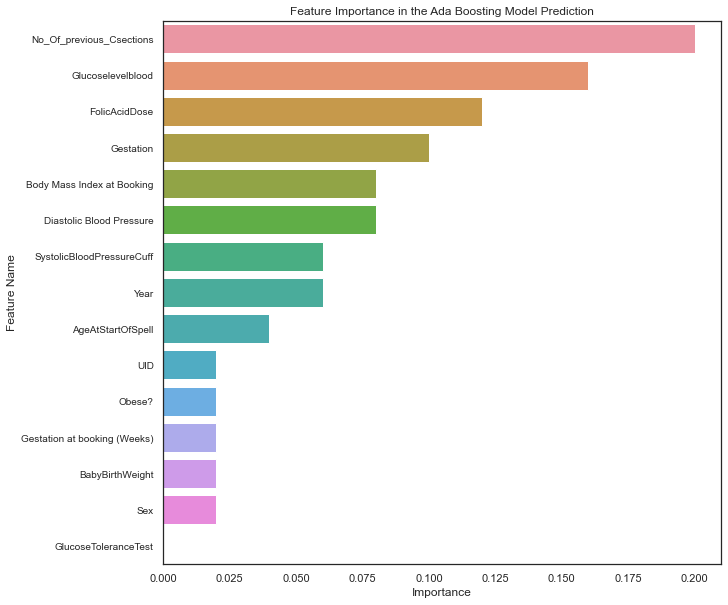

In [108]:
# Ada Boosting  Features
imp_df = pd.DataFrame({"Feature Name":X_smote.columns,"Importance":model.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Ada Boosting Model Prediction")
plt.yticks(size=10)
plt.show()

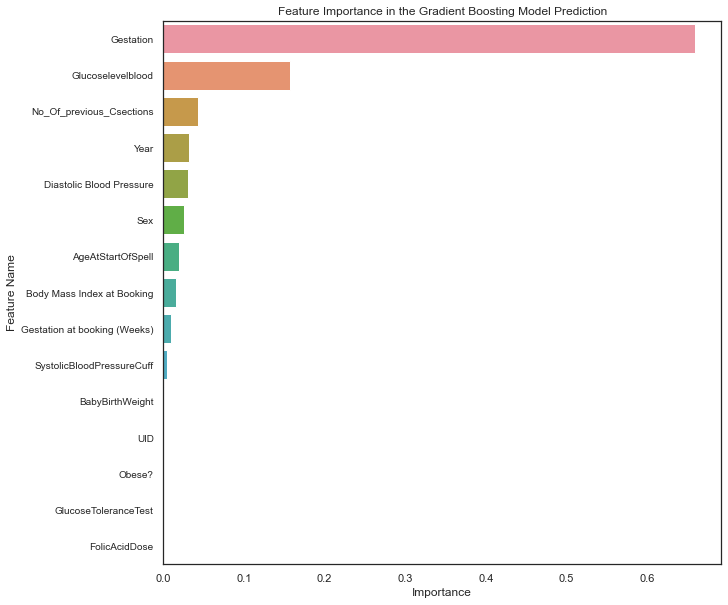

In [109]:
# Gradient Boosting  Features
imp_df = pd.DataFrame({"Feature Name":X_smote.columns,"Importance":model1.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Gradient Boosting Model Prediction")
plt.yticks(size=10)
plt.show()

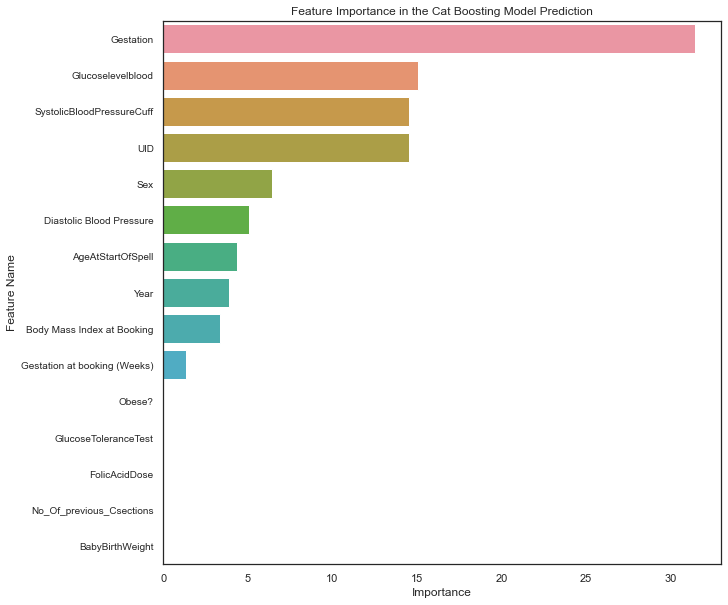

In [110]:
# Catboost  Features
imp_df = pd.DataFrame({"Feature Name":X_smote.columns,"Importance":model2.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Cat Boosting Model Prediction")
plt.yticks(size=10)
plt.show()

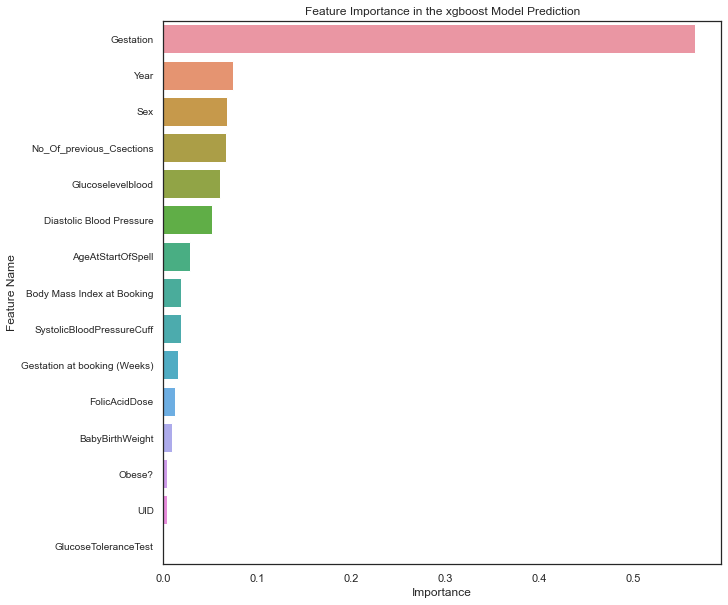

In [111]:
# xgboost Features
imp_df = pd.DataFrame({"Feature Name":X_smote.columns,"Importance":model3.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the xgboost Model Prediction")
plt.yticks(size=10)
plt.show()

In [113]:
# Results
models_metrics = pd.DataFrame([
    ["Ada Boosting Model", round(accuracy_score(y_test,model_pred)*100,2), round(accuracy_score(y_test,adb_pred)*100,2)],
    ["Gradient Boosting Model",round(accuracy_score(y_test,model1_pred)*100,2),round(accuracy_score(y_test,gdb_pred)*100,2)],
    ["Cat Boosting Model", round(accuracy_score(y_test,model2_pred)*100,2),round(accuracy_score(y_test,cbc_pred)*100,2)],
    ["Xgboost Model", round(accuracy_score(y_test,model3_pred)*100,2),round(accuracy_score(y_test,xgb_pred)*100,2)],
    #["Light GBM Model", round(accuracy_score(y_test,model4_pred)*100,2),round(accuracy_score(y_test,gdb_pred)*100,2)],
    ])
models_metrics.columns= ["Model","Accuracy before hypertunning","Accuracy after hypertunning"]
models_metrics.set_index("Model") #
models_metrics

,Model,Accuracy before hypertunning,Accuracy after hypertunning
0,Ada Boosting Model,76.30,78.39
1,Gradient Boosting Model,56.09,83.79
2,Cat Boosting Model,70.82,77.90
3,Xgboost Model,73.47,83.71


In [137]:
# function to add value labels
def addlabels(a,y,z):
    for i in range(len(a)):
        plt.text(i, 70, z[i], ha = 'left',fontweight="black",fontsize='12')
        plt.text(i, 70, y[i], ha = 'right',fontweight="black",fontsize='12')

<Figure size 2160x720 with 0 Axes>

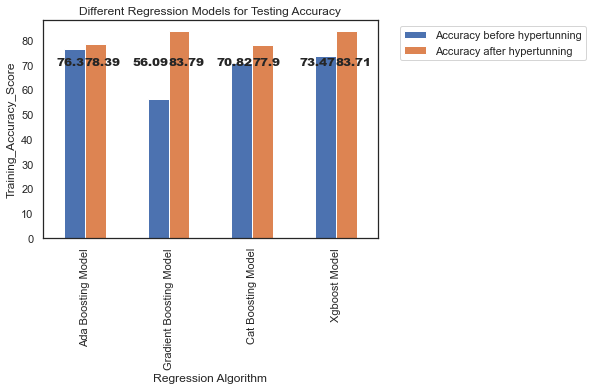

In [141]:
# Creating a bar plot
a= ['Ada Boosting Model','Gradient Boosting Model','Cat Boosting Model','Xgboost Model']
y=[round(accuracy_score(y_test,model_pred)*100,2),round(accuracy_score(y_test,model1_pred)*100,2),round(accuracy_score(y_test,model2_pred)*100,2),round(accuracy_score(y_test,model3_pred)*100,2)]
z=[round(accuracy_score(y_test,adb_pred)*100,2),round(accuracy_score(y_test,gdb_pred)*100,2),round(accuracy_score(y_test,cbc_pred)*100,2),round(accuracy_score(y_test,xgb_pred)*100,2)]

plt.figure(figsize = (30,10))
models_metrics.plot(x="Model", y=["Accuracy before hypertunning", "Accuracy after hypertunning"], kind="bar")

# calling the function to add value labels
addlabels(a,y,z)

# Add labels to your graph
plt.xlabel('Regression Algorithm')
plt.ylabel('Training_Accuracy_Score')
plt.title("Different Regression Models for Testing Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

# Other Models Evaluation Metrics

In [143]:
# Create instances of all other classifier- Using other models
#lgb1=LGBMClassifier()
cbt =CatBoostClassifier() 
xgb = XGBClassifier() 
abc = AdaBoostClassifier()
gbc=GradientBoostingClassifier()

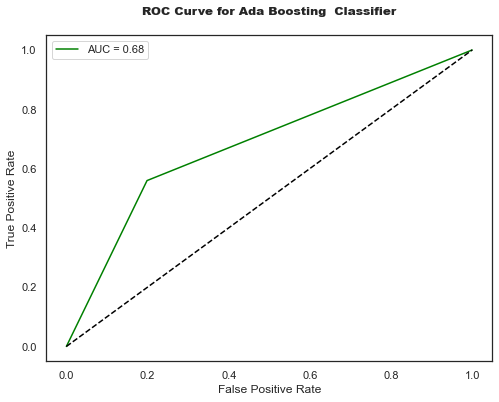

In [144]:
#ROC Curve and Area Under the Curve (AUC) for Ada Boosting
y_adb_pred_proba =grid_adb.best_estimator_.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], adb_pred)
auc = roc_auc_score(df_actual_predicted["y_actual"], adb_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Ada Boosting  Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

 #grid_adb.best

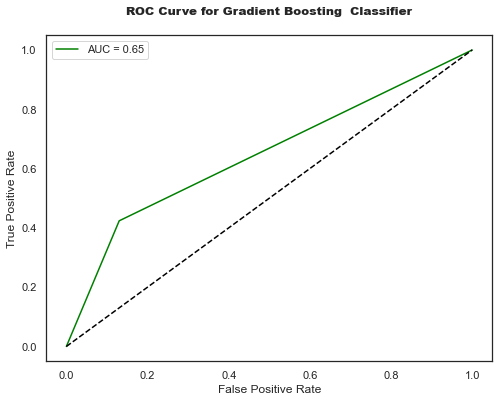

In [145]:
#ROC Curve and Area Under the Curve (AUC) for Gradient Boosting
y_gdb_pred_proba =grid_gdb.best_estimator_.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], gdb_pred)
auc = roc_auc_score(df_actual_predicted["y_actual"], gdb_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting  Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

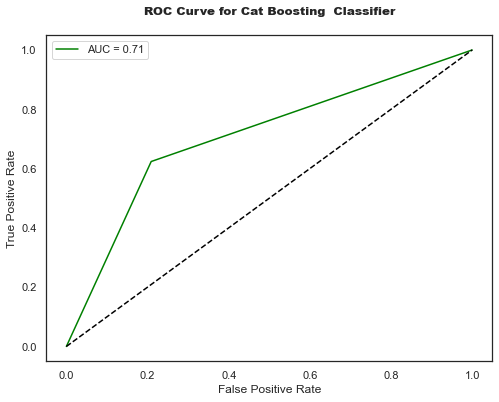

In [146]:
#ROC Curve and Area Under the Curve (AUC) for Cat Boosting
y_cbc_pred_proba =grid_abc.best_estimator_.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], cbc_pred)
auc = roc_auc_score(df_actual_predicted["y_actual"], cbc_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Cat Boosting  Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

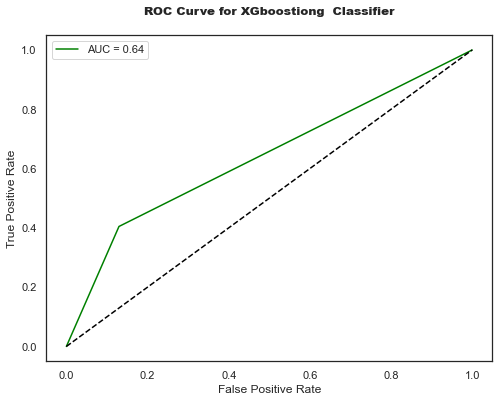

In [147]:
#ROC Curve and Area Under the Curve (AUC) for XG Boosting
y_xgb_pred_proba =grid_xgb.best_estimator_.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], xgb_pred)
auc = roc_auc_score(df_actual_predicted["y_actual"], xgb_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGboostiong  Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy for ada boosting
adb_accuracy = accuracy_score(y_test, adb_pred)
print("Accuracy:", adb_accuracy)

# Calculate precision
adb_precision = precision_score(y_test, adb_pred)
print("Precision:", adb_precision)

# Calculate recall (sensitivity)
adb_recall = recall_score(y_test, adb_pred)
print("Recall (Sensitivity):", adb_recall)

# Calculate F1-score
adb_f1 = f1_score(y_test, adb_pred)
print("F1-Score:", adb_f1)

Accuracy: 0.7839264430444407
Precision: 0.17816527672479152
Recall (Sensitivity): 0.5595238095238095
F1-Score: 0.2702702702702703


In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy for Gradient Boosting boosting
gdb_accuracy = accuracy_score(y_test, gdb_pred)
print("Accuracy:", gdb_accuracy)

# Calculate precision
gdb_precision = precision_score(y_test,gdb_pred)
print("Precision:", gdb_precision)

# Calculate recall (sensitivity)
gdb_recall = recall_score(y_test,gdb_pred)
print("Recall (Sensitivity):", gdb_recall)

# Calculate F1-score
gdb_f1 = f1_score(y_test, gdb_pred)
print("F1-Score:", gdb_f1)

Accuracy: 0.8379022646007152
Precision: 0.20045045045045046
Recall (Sensitivity): 0.4238095238095238
F1-Score: 0.27217125382262997


In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy for Cat Boosting boosting
cbc_accuracy = accuracy_score(y_test, cbc_pred)
print("Accuracy:", cbc_accuracy)

# Calculate precision
cbc_precision = precision_score(y_test,cbc_pred)
print("Precision:", cbc_precision)

# Calculate recall (sensitivity)
cbc_recall = recall_score(y_test,cbc_pred)
print("Recall (Sensitivity):", cbc_recall)

# Calculate F1-score
cbc_f1 = f1_score(y_test, cbc_pred)
print("F1-Score:", cbc_f1)

Accuracy: 0.7789885918610591
Precision: 0.18687589158345222
Recall (Sensitivity): 0.6238095238095238
F1-Score: 0.287596048298573


In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy for Cat XG boosting
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy:", cbc_accuracy)

# Calculate precision
xgb_precision = precision_score(y_test,xgb_pred)
print("Precision:", xgb_precision)

# Calculate recall (sensitivity)
xgb_recall = recall_score(y_test,xgb_pred)
print("Recall (Sensitivity):", xgb_recall)

# Calculate F1-score
xgb_f1 = f1_score(y_test, xgb_pred)
print("F1-Score:", xgb_f1)

Accuracy: 0.7789885918610591
Precision: 0.19384264538198404
Recall (Sensitivity): 0.40476190476190477
F1-Score: 0.26214340786430224


In [152]:
# Results
other_models_metrics = pd.DataFrame([
    ["Ada Boosting Model",adb_precision,adb_recall,adb_f1],
    ["Gradient Boosting Model",gdb_precision,gdb_recall,gdb_f1],
    ["Cat Boosting Model",cbc_precision,cbc_recall,cbc_f1],
    ["Xgboost Model",xgb_precision,xgb_recall,xgb_f1],
    #["Light GBM Model", round(accuracy_score(y_test,model4_pred)*100,2),round(accuracy_score(y_test,gdb_pred)*100,2)],
    ])
other_models_metrics.columns= ["Model","Precision","Sensitivity","F1"]
other_models_metrics.set_index("Model") #
other_models_metrics

,Model,Precision,Sensitivity,F1
0,Ada Boosting Model,0.178165,0.559524,0.270270
1,Gradient Boosting Model,0.200450,0.423810,0.272171
2,Cat Boosting Model,0.186876,0.623810,0.287596
3,Xgboost Model,0.193843,0.404762,0.262143


<Figure size 5760x1080 with 0 Axes>

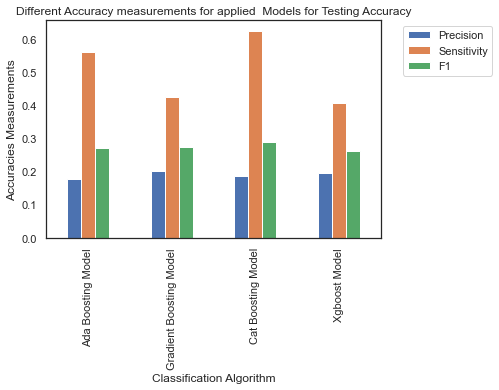

In [161]:
# Creating a bar plot
a= ['Ada Boosting Model','Gradient Boosting Model','Cat Boosting Model','Xgboost Model']
x=[round(adb_precision*100,2),round(gdb_precision*100,2),round(cbc_precision*100,2),round(xgb_precision*100,2)]
y=[round(adb_recall*100,2),round(gdb_recall*100,2),round(cbc_recall*100,2),round(xgb_recall*100,2)]
z=[round(adb_f1*100,2),round(gdb_f1*100,2),round(cbc_f1*100,2),round(xgb_f1*100,2)]

plt.figure(figsize = (80,15))
other_models_metrics.plot(x="Model", y=["Precision","Sensitivity","F1"], kind="bar")

# calling the function to add value labels
#addlabels(a,y,z)

# Add labels to your graph
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracies Measurements')
plt.title("Different Accuracy measurements for applied  Models for Testing Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

# Predicting Gestational Diabtetes with the  Best Parameters

In [162]:
gdb_pred = grid_gdb.predict(X_test)  # Predict Test data with Gradient Boosting, the best model and parameter
gdb_pred

array([0, 1, 0, ..., 0, 0, 0])

# Saving the best Model

In [163]:
joblib.dump(grid_gdb.best_estimator_,'Gestational Diabetic Prediction Final Status.obj')

['Gestational Diabetic Prediction Final Status.obj']

In [164]:
output = pd.DataFrame()
#output['ID'] = new_dt['UID']
output['predicted'] = gdb_pred
output['sttaus']=new_dt['Gestational Diabetes']

In [165]:
output.to_csv('submission file.csv', header=True, index=False)

In [166]:
# Loading the dataset downloaded from kaggle
output_dt=pd.read_csv('submission file.csv')
output_dt.tail(5)

,predicted,sttaus
5868,0,1
5869,0,0
5870,0,0
5871,0,0
5872,0,0


,Y Test,Pred
1297,0,0
5549,0,1
10885,0,0
11887,0,0
20844,0,0
...,...,...
7763,0,0
22874,0,0
18245,0,0
2298,0,0


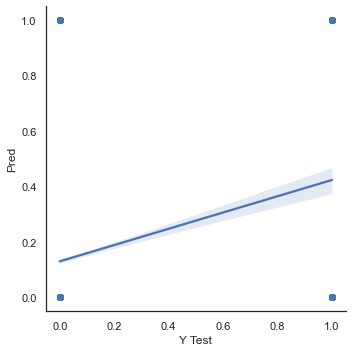

In [168]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':gdb_pred},columns=['Y Test','Pred'])
#cmp_data = pd.DataFrame({'Y Test':np.array(y_test) , 'Pred':np.array(y_pred_grid)},index= range(len(y_test)))
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data